# Importing and Cleaning JSON League Data

This project is to take in tournament data (one round in the form of thousands of JSON files in a folder) from https://historic-data.bayes.gg/ and manipulate the data in a way that is able to perform data analysis on.

Starting by importing Python libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import json
import numpy as np 
import matplotlib.pyplot as plt 
import flat_table
import mysql.connector

'''
mydb = mysql.connector.connect(
  host="localhost",
  user="hchea",
  password="n3w!bLu12"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE mydatabase")
'''

'\nmydb = mysql.connector.connect(\n  host="localhost",\n  user="hchea",\n  password="n3w!bLu12"\n)\n\nmycursor = mydb.cursor()\n\nmycursor.execute("CREATE DATABASE mydatabase")\n'

Here is the function that takes in a directory of where the JSON folders/files are located

In [2]:
def split_into_ind_players(team):
    '''
    Inputs a pandas table of one team and outputs 10 separate tables for each player
    '''
    for each in team['summonerName'].unique():
        playertable = team.loc[team['summonerName'] == each]
        playertable.to_csv(each + '.csv')

In [3]:
def import_and_clean_json1(json):
    '''
    Takes in a JSON file (ideally one tournament), outputs a pandas table that can be converted to a MongoDB database or CSV
    '''

    table = pd.read_json(json, lines = True)  #Read json file info
    
    table = pd.json_normalize(table['data']) #flattens the 'data' column
    return table

In [90]:
champions = pd.read_csv('champions.csv')

In [91]:
items = pd.read_csv("items.csv")

There are 77 columns in <code>leaguedata</code> 
- <code>'createdAt'</code>:  Time stamp of when information was taken 
- <code>'sourceUpdatedAt'</code>: Time stamp of when information was updated 
- <code>'subject'</code>: 3 types of subject: <code>'MATCH'</code>, <code>'TEAM'</code>, <code>'PLAYER'</code> 
- <code>'action'</code>: 26 types of actions: <code>'ANNOUNCE'</code>, <code>'UPDATE'</code>, <code>'PURCHASED_ITEM'</code>, <code>'UPDATE_SCORE'</code>, <code>'UPDATE_POSITIONS'</code>, <code>'CONSUMED_ITEM'</code>, <code>'SPAWNED'</code>, <code>'LEVEL_UP'</code>, <code>'SPAWNED_ANCIENT'</code>, <code>'PLACED_WARD'</code>, <code>'KILL'</code>, <code>'DIED'</code>,  <code>'KILLED_ANCIENT'</code>, <code>'SOLD_ITEM''</code>,  <code>'BANNED_HERO'</code>, <code>'ANNOUNCED_ANCIENT'</code>,  <code>'TOOK_OBJECTIVE'</code>, <code>'KILLED_WARD'</code>, <code>'SELECTED_HERO'</code>, <code>'PICKED_UP_ITEM'</code>, <code>'UNDO_ITEM'</code>, <code>'EXPIRED_OBJECTIVE'</code>, <code>'SPECIAL_KILL'</code>, <code>'END_PAUSE'</code>, <code>'END_MAP'</code>, <code>'START_MAP'</code> 
- <code>'fixture.startTime'</code>: Start time of competition? 
- <code>'fixture.seriesType'</code>: <span style="color:blue">No clue... Just says 'BEST_OF' when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>ANNOUNCE</code> </span>.
- <code>'teams'</code>: JSON of players and player ids, linked to <code>participants</code> table 
- <code>'pickTurn'</code>: Champion pick order 
- <code>'teamOne.liveDataTeamUrn'</code>: <span style="color:blue">Unique Team ID for Team One for data collection purposes??? "live:lol:riot:team:98926509884398584"</span>
- <code>'teamOne.players'</code>: JSON of Team One players 
- <code>'teamOne.references.RIOT_ESPORTS_ID'</code>: <span style="color:blue">No clue, just says one value "98926509884398584" when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code></span>
- <code>'teamTwo.liveDataTeamUrn'</code>: <span style="color:blue">No clue, just says one value "live:lol:riot:team:98926509885559666" when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code></span>
- <code>'teamTwo.players'</code>: JSON of Team Two players 
- <code>'teamTwo.references.RIOT_ESPORTS_ID'</code>: <span style="color:blue"> No clue, just says one value "98926509885559666" when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code></span>
- <code>'bannedChampions'</code>: JSON of banned Champions 
- <code>'gameTime'</code>: Time stamp of event in game in milliseconds 
- <code>'playerUrn'</code>: Unique player ID for data collection purposes 
- <code>'teamUrn'</code>: Unique team ID for data collection purposes 
- <code>'item'</code>: Number coorrelates to certain item 
- <code>'name'</code>: Game number 
- <code>'sequenceIndex'</code>: <span style="color:blue"> No clue???? It just says "432., 433., ..., 429., 430., 431." when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code></span>
- <code>'lastUpdateTime'</code>: Last update time when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'gameOver'</code>: Boolean values (True, False) if game is over
- <code>'paused'</code>: Boolean value (True, False) if game is paused
- <code>'winningTeam'</code>: <span style="color:blue"> No clue??? It just says 0.0 </span>
- <code>'winningTeamUrn'</code>: Unique team ID of winning team 
- <code>'teamOne.esportsTeamId'</code>: When <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.assists'</code>: Number of assists by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.baronKills'</code>: Number of baron kills by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.championsKills'</code>: Number of  kills by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.deaths'</code>: Number of team deaths for Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.dragonKills'</code>: Number of dragon kills by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.inhibKills'</code>: Number of inhibitor destroyed by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.teamID'</code>: Number of inhibitor destroyed by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.totalGold'</code>: Number of total gold for Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.towerKills'</code>: Number of towers destroyed by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamOne.killedDragonTypes'</code>: Types of dragon destroyed by Team One when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.esportsTeamId'</code>: Number of assists for Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.assists'</code>: Number of assists for Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.baronKills'</code>: Number of baron kills by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.championsKills'</code>: Number of  kills by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.deaths'</code>: Number of team deaths for Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.dragonKills'</code>: Number of dragon kills by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.inhibKills'</code>: Number of inhibitor destroyed for Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'teamTwo.teamID'</code>: Number of inhibitor destroyed by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code> 
- <code>'teamTwo.totalGold'</code>: Number of total gold for Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code> 
- <code>'teamTwo.towerKills'</code>: Number of towers destroyed by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code> 
- <code>'teamTwo.killedDragonTypes'</code>: Types of dragon destroyed by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code> 
- <code>'towersKilled'</code>: Number of towers destroyed by Team Two when <code>'subject'</code> == <code>'MATCH'</code> and <code>'action'</code> == <code>UPDATE</code>
- <code>'championsKilled'</code>: Number of champions killed at a timestamp
- <code>'totalGold'</code>: Total amount of gold at a timestamp
- <code>'positions'</code>: JSON list of unqiue player ID's and [X, Y] positions
- <code>'position'</code>: [X, Y] positions of I don't know what
- <code>'newValue'</code>: Updates level of player when <code>'subject'</code> == <code>'PLAYER'</code> and <code>'action'</code> == <code>LEVEL_UP</code>
- <code>'monsterType'</code>: 10 types of monsters: <code>'dragon'</code>, <code>'raptor'</code>, <code>'gromp'</code>, <code>'wolf'</code>, <code>'scuttleCrab'</code>, <code>'redCamp'</code>, <code>'blueCamp'</code>, <code>'krug'</code>, <code>'riftHerald'</code>, <code>'baron'</code>
- <code>'dragonType'</code>: 4 types of dragons: <code>'fire'</code>, <code>'air'</code>, <code>'earth'</code>, <code>'elder'</code>
- <code>'wardType'</code>: 5 types of wards: <code>'yellowTrinket'</code>, <code>'control'</code>, <code>'sight'</code>, <code>'blueTrinket'</code>, <code>'unknown'</code>
- <code>'placerUrn'</code>: Unique player ID of player who placed ward 
- <code>'placerTeamUrn'</code>: Unique team ID of player who placed ward 
- <code>'killerUrn'</code>: Unique player ID of player who killed an enemy 
- <code>'killerTeamUrn'</code>: Unqiue team ID of player who killed an enemy 
- <code>'victimUrn'</code>: Unique player ID of player who died 
- <code>'victimTeamUrn'</code>: Unique team ID of player who died 
- <code>'assistants'</code>: <span style="color:blue">No clue??? Literally just null values</span>
- <code>'totalDeaths'</code>: <span style="color:blue">Updates umber of deaths for player when <code>'subject'</code> == <code>'PLAYER'</code> and <code>'action'</code> == <code>DIED</code></span>
- <code>'respawnTime'</code>: Respawn time 
- <code>'championId'</code>: Unique champion ID
- <code>'spawnGameTime'</code>: <span style="color:blue">No clue, just says "669000., 1070000., 1405000., 1714000., 2033000., 2404000.,  300000."</span>
- <code>'buildingType'</code>: 3 types of buildings: <code>'turretPlate'</code>, <code>'turret'</code>, <code>'inhibitor'</code> 
- <code>'buildingTeamUrn'</code>: <span style="color:blue">No clue, might be unique ID of each building????</span>
- <code>'lane'</code>: 3 types of lanes: <code>'bot'</code>, <code>'mid'</code>, <code>'top'</code>
- <code>'turretTier'</code>: 5 types turrets: <code>'outer'</code>, <code>'inner'</code>, <code>'base'</code>, <code>'nexus'</code>, <code>None</code>
- <code>'killType'</code>: 2 types of kills: <code>'multi'</code>, <code>'firstBlood'</code>
- <code>'killStreak'</code>: When <code>'subject'</code> == <code>'PLAYER'</code> and <code>'action'</code> == <code>SPECIAL_KILL</code>

# Scrim Automater Project Starts here

Bayes Website 2021 Scrim Data: GG vs CLG
The data has changed a lot since Fall 2020. Columns are now different.

## Objective
Automatically have an output of the following stats as seen in this sheet
This should be a quick and seamless process to save time for the team

## Labels
- Date of Game
- Game Number
- Opponent
- <s>Winning team </s>
    - 'winningteam' from <code>Match Subject</code> (100 for Team One, 200 for Team Two)

## General Matching
- Team Matching (Identify whether Blue or Red is CLG)
    - Which is 100 and which is 200?
- <s>Player → Specific Stats
    - Ex. CLG Finn needs to be identified as the top laner</s>
    
## Objective Stats
- First Blood
	- Indicate which team obtained the first kill of the game
- First Drag
	- Indicate which team obtained first dragon of the game
- First Herald
	- Indicate which team obtained first herald of the game
- First tower
	- Indicate which team destroyed the first tower
- Mid Tower
	- Indicate which team took down the first tier 1 mid tower
        - Can be the same as first tower of game
        
## Individual Stats
- For each player, indicate the relative difference of the CLG player and the respective enemy player
    - [Top, Jungle, Mid, AD, Support]
        - gonna need another data set
    - CSD@10 - Creep Score Difference at 10 minutes
	- <s>GD@10 - Gold Difference at 10 minutes 
        - <code>'currentgold'</code> from <code>Team One/Two</code> (for each player, but doesn't tell what lane is each player)
	- XPD@10 - Experience difference at 10 minutes
        - <code>'experience'</code> from <code>Team One/Two</code> (for each player, but doesn't tell what lane is each player</s>
        - CSD@15 - Creep score difference at 15 minutes
        - <s>XPD@15 - Experience difference at 15 minutes</s>
    
## Team Stats
- Indicate the relative difference between CLG and the enemy team in…
	- GD@15 - Overall gold difference at 15 minutes
	- GD@20 - Overall gold difference at 20 minutes
    
## Bonus
- Isolated Deaths
    - Total count of deaths of a player when he’s isolated from the rest of the team



In [11]:
#Full data table
json_dir = "\\Users\\cheah\\Documents\\CLG\\BayesEsports\\live-lol-riot-map-esportstmnt02-1930645"
rawdata = import_and_clean_json(json_dir)
rawdata.to_csv('live-lol-riot-map-esportstmnt02-1930645.csv')
rawdata

,urn,type,version,createdAt,liveDataMatchUrn,sourceUpdatedAt,title,type,subject,action,...,respawnTime,buildingType,buildingTeamUrn,lane,turretTier,spawnGameTime,killType,killStreak,matchCurrent,seriesStatus.seriesScores.live:lol:riot:team:one
0,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:03.803090Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:06:00Z,LOL,INFO,MATCH,ANNOUNCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:04.481737Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:06:00Z,LOL,SNAPSHOT,TEAM,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:05.131315Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:13:01.416Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.740311Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:28.227Z,LOL,GAME_EVENT,PLAYER,PLACED_WARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.747329Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:28.227Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.717152Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:26.542Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8715,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.720150Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:26.542Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8716,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.724160Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:27.567Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8717,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.727239Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:27.567Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Columns for the full raw data:

In [8]:
rawdata.columns

Index(['urn', 'type', 'version', 'createdAt', 'liveDataMatchUrn',
       'sourceUpdatedAt', 'title', 'type', 'subject', 'action', 'fixture.urn',
       'fixture.startTime', 'fixture.title', 'fixture.seriesCurrent',
       'fixture.seriesMax', 'fixture.seriesType', 'fixture.esportsId', 'teams',
       'additionalProperties.perId', 'additionalProperties.esportsGameID',
       'additionalProperties.taskId', 'pickTurn', 'teamOne.liveDataTeamUrn',
       'teamOne.players', 'teamTwo.liveDataTeamUrn', 'teamTwo.players',
       'bannedChampions', 'gameID', 'esportsGameID', 'platformID', 'name',
       'gameVersion', 'playbackId', 'sequenceIndex', 'lastUpdateTime',
       'seriesStatus.perid', 'seriesStatus.seriesCurrent',
       'seriesStatus.seriesMax', 'seriesStatus.seriesType', 'gameState',
       'gameTime', 'gameMode', 'gameOver', 'paused', 'winningTeam',
       'winningTeamUrn', 'teamOne.esportsTeamId', 'teamOne.assists',
       'teamOne.baronKills', 'teamOne.championsKills', 'teamOne.de

# This is a player table based on a subset of the raw data

In [180]:
#Player table from full table
playersubjecttable = rawdata.loc[rawdata['subject'] == "PLAYER"]
#playersubjecttable.to_csv('live-lol-riot-map-esportstmnt02-1930645-PLAYER-SUBJECT.csv')
playersubjecttable

,urn,type,version,createdAt,liveDataMatchUrn,sourceUpdatedAt,title,type,subject,action,...,respawnTime,buildingType,buildingTeamUrn,lane,turretTier,spawnGameTime,killType,killStreak,matchCurrent,seriesStatus.seriesScores.live:lol:riot:team:one
3,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.740311Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:28.227Z,LOL,GAME_EVENT,PLAYER,PLACED_WARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.751179Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:28.589Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.758327Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:29.615Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.765854Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:30.642Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:05.136405Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:13:01.417Z,LOL,GAME_EVENT,PLAYER,PURCHASED_ITEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:05.125815Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:13:01.416Z,LOL,GAME_EVENT,PLAYER,PURCHASED_ITEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8710,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.703228Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:25.518Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8712,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.709542Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:26.409Z,LOL,GAME_EVENT,PLAYER,LEVEL_UP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8714,live:lol:riot:map:esportstmnt02-1930645,LOL_RIOT_WEB_LIVESTATS,0.3,2021-06-01T00:54:08.717152Z,live:lol:riot:map:esportstmnt02-1930645,2021-06-01T00:17:26.542Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Team table from full table
teamsubjecttable = rawdata.loc[rawdata['subject'] == "TEAM"]
#teamsubjecttable.to_csv('live-lol-riot-map-esportstmnt02-1930645-TEAM-SUBJECT.csv')

# This is the Team One dataset based on the player table

In [18]:
teamOne = pd.DataFrame()
for each in dummy[dummy["teamOne.players"].notnull()]['teamOne.players']:
    teamOne = pd.concat([teamOne, pd.json_normalize(each)])
teamOne.to_csv('live-lol-riot-map-esportstmnt02-1930645-TEAM-ONE.csv')


In [19]:
teamOne

,liveDataPlayerUrn,liveDataTeamUrn,championID,summonerName,pickTurn,pickMode,participantID,teamID,esportsPlayerID,esportsTeamID,...,stats.totalDamageDealtToObjectives,stats.totalTimeCrowdControlDealt,stats.totalHealOnTeammates,stats.totalTimeCCOthers,spell1.name,spell1.cooldownRemaining,spell2.name,spell2.cooldownRemaining,ultimate.name,ultimate.cooldownRemaining
0,live:lol:riot:player:6bdd5612-f008-30bf-95f3-c...,live:lol:riot:team:one,0,EG Impact,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:player:ff6dcb02-f17a-3b35-8097-4...,live:lol:riot:team:one,0,EG Contractz,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:player:e22e9332-d4b8-3da7-b5f4-b...,live:lol:riot:team:one,0,EG Jiizuke,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:player:989054ed-d764-33f8-81d9-7...,live:lol:riot:team:one,0,EG Danny,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:player:e04c191d-aba4-30ed-81bf-6...,live:lol:riot:team:one,0,EG IgNar,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,live:lol:riot:player:6bdd5612-f008-30bf-95f3-c...,live:lol:riot:team:one,64,EG Impact,0,2,1.0,100.0,0.0,0.0,...,0.000000,73.311646,0.0,4.832919,SummonerFlash,230.88681,SummonerTeleport,342.429718,BlindMonkRKick,0.0
1,live:lol:riot:player:ff6dcb02-f17a-3b35-8097-4...,live:lol:riot:team:one,131,EG Contractz,0,2,2.0,100.0,0.0,0.0,...,573.959961,67.396866,0.0,2.056487,SummonerSmite,0.00000,SummonerFlash,184.726868,DianaR,0.0
2,live:lol:riot:player:e22e9332-d4b8-3da7-b5f4-b...,live:lol:riot:team:one,157,EG Jiizuke,0,2,3.0,100.0,0.0,0.0,...,0.000000,11.390640,0.0,0.989624,SummonerFlash,0.00000,SummonerTeleport,341.445526,YasuoR,0.0
3,live:lol:riot:player:989054ed-d764-33f8-81d9-7...,live:lol:riot:team:one,145,EG Danny,0,2,4.0,100.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,SummonerFlash,0.00000,SummonerHeal,0.000000,KaisaR,0.0


In [45]:
createdAt = np.repeat(dummy['createdAt'], 5).reset_index(drop=True)
sourceUpdatedat = np.repeat(dummy['sourceUpdatedAt'], 5).reset_index(drop=True)
gameTime = np.repeat(dummy['gameTime'], 5).reset_index(drop=True)

In [44]:
newteamOne = teamOne.copy().reset_index(drop=True)
newteamOne['createdAt'] = createdAt
newteamOne['sourceUpdatedAt'] = sourceUpdatedat
newteamOne['gameTime'] = gameTime
newnewteamOne = newteamOne[['createdAt', 'sourceUpdatedAt', 'gameTime', 'summonerName', 'summonerID', 'accountID', 
                            'teamID', 'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
newnewteamOne

,createdAt,sourceUpdatedAt,gameTime,summonerName,summonerID,accountID,teamID,championID,pickTurn,pickMode,level,experience,currentGold,totalGold,goldPerSecond,stats.minionsKilled,stats.championsKilled
0,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG Impact,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG Contractz,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG Jiizuke,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG Danny,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG IgNar,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19220,06/01/21:00:54:08,06/01/21:00:17:27,269381.0,EG Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,4.0,1267.0,240.0,1140.0,0.0,17.0,0.0
19221,06/01/21:00:54:08,06/01/21:00:17:27,269381.0,EG Contractz,2.686751e+15,2.686751e+15,100.0,131,0,2,4.0,1198.0,501.0,1426.0,0.0,0.0,0.0
19222,06/01/21:00:54:08,06/01/21:00:17:27,269381.0,EG Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,4.0,1570.0,283.0,1403.0,0.0,27.0,0.0
19223,06/01/21:00:54:08,06/01/21:00:17:27,269381.0,EG Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,3.0,1095.0,952.0,1452.0,0.0,30.0,0.0


In [55]:
newnewteamOne.to_csv('live-lol-riot-map-esportstmnt02-1930645-NEW-TEAM-ONE.csv')

In [53]:
newnewteamOne.sort_values('createdAt')

,createdAt,sourceUpdatedAt,gameTime,summonerName,summonerID,accountID,teamID,championID,pickTurn,pickMode,level,experience,currentGold,totalGold,goldPerSecond,stats.minionsKilled,stats.championsKilled
0,06/01/21:00:54:04,06/01/21:00:06:00,NaN,EG Impact,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8692,06/01/21:00:54:04,06/01/21:00:10:00,NaN,EG Jiizuke,NaN,NaN,NaN,145,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691,06/01/21:00:54:04,06/01/21:00:10:00,NaN,EG Contractz,NaN,NaN,NaN,111,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,06/01/21:00:54:04,06/01/21:00:10:00,NaN,EG Impact,NaN,NaN,NaN,64,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8204,06/01/21:00:54:04,06/01/21:00:10:00,NaN,EG IgNar,NaN,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,06/01/21:00:54:36,06/01/21:00:51:36,2318527.0,EG Contractz,2.686751e+15,2.686751e+15,100.0,131,0,2,17.0,17360.0,1642.0,13566.0,0.0,42.0,3.0
18782,06/01/21:00:54:36,06/01/21:00:51:36,2318527.0,EG Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,18.0,22182.0,1153.0,16527.0,0.0,325.0,2.0
18783,06/01/21:00:54:36,06/01/21:00:51:36,2318527.0,EG Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,18.0,20090.0,2642.0,20070.0,0.0,395.0,9.0
18810,06/01/21:00:54:36,06/01/21:00:51:38,2320079.0,EG Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,18.0,21250.0,2042.0,15571.0,0.0,245.0,3.0


## Analyzing the time series data
Why are there 3 time columns: <code>createdAt</code>, <code>sourceUpdatedAt</code>, and <code>gameTime</code>? Tafo recommended me that gameTime is our best bet because the rest is wild.

I looked at the graphs of each of these 3 columns against total gold because total gold should naturall increase with time.

<AxesSubplot:xlabel='gameTime'>

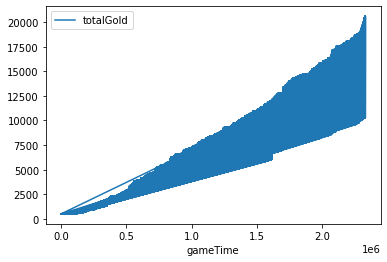

In [49]:
newnewteamOne.plot(x='gameTime', y='totalGold')

<AxesSubplot:xlabel='createdAt'>

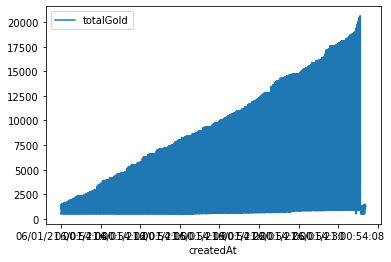

In [51]:
newnewteamOne.plot(x='createdAt', y='totalGold')

<AxesSubplot:xlabel='sourceUpdatedAt'>

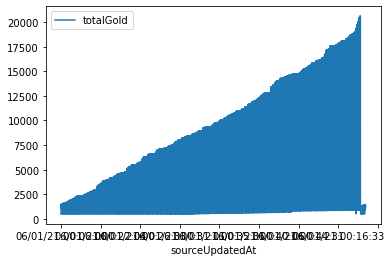

In [52]:
newnewteamOne.plot(x='sourceUpdatedAt', y='totalGold')

## CreatedAt Intervals
Conclusion: <code>createdAt</code> is useless because all the intervals have the same time

In [175]:
print('Interval 0, 5-45: ' + str(newnewteamOne.loc[0]['createdAt']) + ' or ' + str(newnewteamOne['createdAt'].loc[5]) + ' to ' + str(newnewteamOne['createdAt'].loc[45]))
print('Interval 50-95: ' + str(newnewteamOne.loc[50]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[95]))
print('Interval 100-150: ' + str(newnewteamOne.loc[100]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[150]))
print('Interval 155-200: ' + str(newnewteamOne.loc[155]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[200]))
print('Interval 205-250: ' + str(newnewteamOne.loc[205]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[250]))
print()
print('Interval 255, 260-305: ' + str(newnewteamOne.loc[255]['createdAt']) + ' or ' + str(newnewteamOne['createdAt'].loc[260]) + ' to ' + str(newnewteamOne['createdAt'].loc[305]))
print('Interval 310-355: ' + str(newnewteamOne.loc[310]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[355]))
print('Interval 360-405: ' + str(newnewteamOne.loc[360]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[405]))
print('Interval 410-455: ' + str(newnewteamOne.loc[410]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[455]))
print('Interval 460-505: ' + str(newnewteamOne.loc[460]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[505]))
print('Interval 510-545: ' + str(newnewteamOne.loc[510]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[545]))
print('Interval 550-595: ' + str(newnewteamOne.loc[550]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[595]))
print('Interval 600-645: ' + str(newnewteamOne.loc[600]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[645]))
print('Interval 650-690: ' + str(newnewteamOne.loc[650]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[690]))
print('Interval 695-740: ' + str(newnewteamOne.loc[695]['createdAt']) + ' to ' + str(newnewteamOne['createdAt'].loc[740]))
print()
print('Interval 745,750-795:' + str(newnewteamOne.loc[745]['createdAt']) + ' or ' + str(newnewteamOne['createdAt'].loc[750]) + ' to ' + str(newnewteamOne['createdAt'].loc[795]))
print()

Interval 0, 5-45: 06/01/21:00:54:04 or 06/01/21:00:54:05 to 06/01/21:00:54:08
Interval 50-95: 06/01/21:00:54:05 to 06/01/21:00:54:08
Interval 100-150: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 155-200: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 205-250: 06/01/21:00:54:05 to 06/01/21:00:54:09

Interval 255, 260-305: 06/01/21:00:54:04 or 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 310-355: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 360-405: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 410-455: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 460-505: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 510-545: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 550-595: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 600-645: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 650-690: 06/01/21:00:54:05 to 06/01/21:00:54:09
Interval 695-740: 06/01/21:00:54:05 to 06/01/21:00:54:09

Interval 745,750-795:06/01/21:00:54:04 or 06/01/21:00:54:05 to 06/01/21:00:54:09



## GameTime Intervals

Taking a closer look at <code>gameTime</code>, the values of gameTime reset every 50 rows, which is like every 10 time intervals.

In [182]:
print('Interval 0, 5-45: ' + str(newnewteamOne.loc[0]['gameTime']) + ' or ' + str(newnewteamOne['gameTime'].loc[5]) + ' to ' + str(newnewteamOne['gameTime'].loc[45]))
print('Interval 50-95: ' + str(newnewteamOne.loc[50]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[95]))
print('Interval 100-150: ' + str(newnewteamOne.loc[100]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[150]))
print('Interval 155-200: ' + str(newnewteamOne.loc[155]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[200]))
print('Interval 205-250: ' + str(newnewteamOne.loc[205]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[250]))
print()
print('Interval 255, 260-305: ' + str(newnewteamOne.loc[255]['gameTime']) + ' or ' + str(newnewteamOne['gameTime'].loc[260]) + ' to ' + str(newnewteamOne['gameTime'].loc[305]))
print('Interval 310-355: ' + str(newnewteamOne.loc[310]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[355]))
print('Interval 360-405: ' + str(newnewteamOne.loc[360]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[405]))
print('Interval 410-455: ' + str(newnewteamOne.loc[410]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[455]))
print('Interval 460-505: ' + str(newnewteamOne.loc[460]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[505]))
print('Interval 510-545: ' + str(newnewteamOne.loc[510]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[545]))
print('Interval 550-595: ' + str(newnewteamOne.loc[550]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[595]))
print('Interval 600-645: ' + str(newnewteamOne.loc[600]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[645]))
print('Interval 650-690: ' + str(newnewteamOne.loc[650]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[690]))
print('Interval 695-740: ' + str(newnewteamOne.loc[695]['gameTime']) + ' to ' + str(newnewteamOne['gameTime'].loc[740]))
print()
print('Interval 745,750-795: ' + str(newnewteamOne.loc[745]['gameTime']) + ' or ' + str(newnewteamOne['gameTime'].loc[750]) + ' to ' + str(newnewteamOne['gameTime'].loc[795]))


Interval 0, 5-45: nan or 3071.0 to 276384.0
Interval 50-95: 3071.0 to 282697.0
Interval 100-150: 3071.0 to 286631.0
Interval 155-200: 3268.0 to 292771.0
Interval 205-250: 3465.0 to 296873.0

Interval 255, 260-305: nan or 3498.0 to 304057.0
Interval 310-355: 3661.0 to 309186.0
Interval 360-405: 4089.0 to 315342.0
Interval 410-455: 4651.0 to 322526.0
Interval 460-505: 4651.0 to 327786.0
Interval 510-545: 4850.0 to 334833.0
Interval 550-595: 5082.0 to 343027.0
Interval 600-645: 5115.0 to 348155.0
Interval 650-690: 5347.0 to 353271.0
Interval 695-740: 5611.0 to 357732.0

Interval 745,750-795: nan or 5941.0 to 361469.0


## SourceUpdatedAt Intervals
Conclusion: <code>SourceupdatedAt</code> is actually the most helpful time data. Every 10 intervals, 

<p>I just don't know why there are random null values that don't follow the chronological order, specifically at index 0, index 255, and index 745. I think they are probably some other data that snuck in when flattening the JSON.


In [181]:
print('Interval 0, 5-45: ' + str(newnewteamOne.loc[0]['sourceUpdatedAt']) + ' or ' + str(newnewteamOne['sourceUpdatedAt'].loc[5]) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[45]))
print('Interval 50-95: ' + str(newnewteamOne.loc[50]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[95]))
print('Interval 100-150: ' + str(newnewteamOne.loc[100]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[150]))
print('Interval 155-200: ' + str(newnewteamOne.loc[155]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[200]))
print('Interval 205-250: ' + str(newnewteamOne.loc[205]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[250]))
print()
print('Interval 255, 260-305: ' + str(newnewteamOne.loc[255]['sourceUpdatedAt']) + ' or ' + str(newnewteamOne['sourceUpdatedAt'].loc[260]) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[305]))
print('Interval 310-355: ' + str(newnewteamOne.loc[310]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[355]))
print('Interval 360-405: ' + str(newnewteamOne.loc[360]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[405]))
print('Interval 410-455: ' + str(newnewteamOne.loc[410]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[455]))
print('Interval 460-505: ' + str(newnewteamOne.loc[460]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[505]))
print()
print('Interval 510-545: ' + str(newnewteamOne.loc[510]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[545]))
print('Interval 550-595: ' + str(newnewteamOne.loc[550]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[595]))
print('Interval 600-645: ' + str(newnewteamOne.loc[600]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[645]))
print('Interval 650-690: ' + str(newnewteamOne.loc[650]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[690]))
print('Interval 695-740: ' + str(newnewteamOne.loc[695]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[740]))
print()
print('Interval 745,750-795: ' + str(newnewteamOne.loc[745]['sourceUpdatedAt']) + ' or ' + str(newnewteamOne['sourceUpdatedAt'].loc[750]) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[795]))
print()
print('Interval 510-545: ' + str(newnewteamOne.loc[510]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[545]))
print('Interval 550-595: ' + str(newnewteamOne.loc[550]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[595]))
print('Interval 600-645: ' + str(newnewteamOne.loc[600]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[645]))
print('Interval 650-690: ' + str(newnewteamOne.loc[650]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[690]))
print('Interval 695-740: ' + str(newnewteamOne.loc[695]['sourceUpdatedAt']) + ' to ' + str(newnewteamOne['sourceUpdatedAt'].loc[740]))
print()


Interval 0, 5-45: 06/01/21:00:06:00 or 06/01/21:00:13:01 to 06/01/21:00:17:34
Interval 50-95: 06/01/21:00:13:01 to 06/01/21:00:17:41
Interval 100-150: 06/01/21:00:13:01 to 06/01/21:00:17:44
Interval 155-200: 06/01/21:00:13:01 to 06/01/21:00:17:51
Interval 205-250: 06/01/21:00:13:01 to 06/01/21:00:17:55

Interval 255, 260-305: 06/01/21:00:07:00 or 06/01/21:00:13:01 to 06/01/21:00:18:02
Interval 310-355: 06/01/21:00:13:02 to 06/01/21:00:18:07
Interval 360-405: 06/01/21:00:13:02 to 06/01/21:00:18:13
Interval 410-455: 06/01/21:00:13:02 to 06/01/21:00:18:20
Interval 460-505: 06/01/21:00:13:02 to 06/01/21:00:18:26

Interval 510-545: 06/01/21:00:13:03 to 06/01/21:00:18:33
Interval 550-595: 06/01/21:00:13:03 to 06/01/21:00:18:41
Interval 600-645: 06/01/21:00:13:03 to 06/01/21:00:18:46
Interval 650-690: 06/01/21:00:13:03 to 06/01/21:00:18:51
Interval 695-740: 06/01/21:00:13:03 to 06/01/21:00:18:56

Interval 745,750-795: 06/01/21:00:07:00 or 06/01/21:00:13:04 to 06/01/21:00:18:59



<p>I don't know exactly what these intervals are, but i think of the end of the first 50 rows and set 00:17:34 as 0, i can determine CSD@10, GD@10, CSD@15, GD@15, and GD@20 when by looking at whatever group of 50 ends around 00:27:34, 00:32:34, and 00:37:34.
    
<p> Jk this 00:13:00 minute shit is driving me crazy so I'm just going to take them all out because they provide no value.

In [8]:
#newnewnewteamOne = newnewteamOne.dropna().sort_values('sourceUpdatedAt').reset_index()
#newnewnewteamOne.to_csv('live-lol-riot-map-esportstmnt02-1930645-NEW-NEW-TEAM-ONE.csv')
newnewnewteamOne = pd.read_csv('live-lol-riot-map-esportstmnt02-1930645-NEW-NEW-TEAM-ONE.csv').drop('Unnamed: 0', axis = 1)

In [9]:
print('First row/time stamp for EG Contractz: ' + str(newnewnewteamOne.loc[2]['sourceUpdatedAt']))
print('First minion kill for EG Contractz: ' + str(newnewnewteamOne.loc[2201]['sourceUpdatedAt']))
print('10 Minute Mark for EG Contractz: ' + str(newnewnewteamOne.loc[2201]['sourceUpdatedAt']))
print('End row/time stamp for EG Contractz: ' + str(newnewnewteamOne.loc[2201]['sourceUpdatedAt']))

First row/time stamp for EG Contractz: 06/01/21:00:12:58
First minion kill for EG Contractz: 06/01/21:00:17:32
10 Minute Mark for EG Contractz: 06/01/21:00:17:32
End row/time stamp for EG Contractz: 06/01/21:00:17:32


In [15]:
newnewnewteamOne

,index,createdAt,sourceUpdatedAt,gameTime,summonerName,summonerID,accountID,teamID,championID,pickTurn,pickMode,level,experience,currentGold,totalGold,goldPerSecond,stats.minionsKilled,stats.championsKilled
0,18642,06/01/21:00:54:05,06/01/21:00:12:58,134.0,EG Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
1,18640,06/01/21:00:54:05,06/01/21:00:12:58,134.0,EG Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
2,18641,06/01/21:00:54:05,06/01/21:00:12:58,134.0,EG Contractz,2.686751e+15,2.686751e+15,100.0,131,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
3,18643,06/01/21:00:54:05,06/01/21:00:12:58,134.0,EG Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
4,18644,06/01/21:00:54:05,06/01/21:00:12:58,134.0,EG IgNar,1.350326e+06,2.382279e+15,100.0,111,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,18902,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,EG Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,18.0,22289.0,471.0,16715.0,0.0,327.0,2.0
18971,18900,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,EG Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,18.0,21517.0,2198.0,15727.0,0.0,250.0,3.0
18972,18909,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,EG IgNar,1.350326e+06,2.382279e+15,100.0,111,0,2,16.0,15314.0,1085.0,10290.0,30.0,45.0,2.0
18973,18903,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,EG Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,18.0,20623.0,3172.0,20601.0,0.0,399.0,9.0


In [10]:
newnewnewteamOne[['teamName', 'summonerName']] = newnewnewteamOne["summonerName"].str.split(' ', expand=True)
newnewnewteamOne

,index,createdAt,sourceUpdatedAt,gameTime,summonerName,summonerID,accountID,teamID,championID,pickTurn,pickMode,level,experience,currentGold,totalGold,goldPerSecond,stats.minionsKilled,stats.championsKilled,teamName
0,18642,06/01/21:00:54:05,06/01/21:00:12:58,134.0,Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0,EG
1,18640,06/01/21:00:54:05,06/01/21:00:12:58,134.0,Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0,EG
2,18641,06/01/21:00:54:05,06/01/21:00:12:58,134.0,Contractz,2.686751e+15,2.686751e+15,100.0,131,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0,EG
3,18643,06/01/21:00:54:05,06/01/21:00:12:58,134.0,Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0,EG
4,18644,06/01/21:00:54:05,06/01/21:00:12:58,134.0,IgNar,1.350326e+06,2.382279e+15,100.0,111,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0,EG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,18902,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,Jiizuke,1.350250e+06,2.382275e+15,100.0,157,0,2,18.0,22289.0,471.0,16715.0,0.0,327.0,2.0,EG
18971,18900,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,Impact,1.350270e+06,2.382276e+15,100.0,64,0,2,18.0,21517.0,2198.0,15727.0,0.0,250.0,3.0,EG
18972,18909,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,IgNar,1.350326e+06,2.382279e+15,100.0,111,0,2,16.0,15314.0,1085.0,10290.0,30.0,45.0,2.0,EG
18973,18903,06/01/21:00:54:36,06/01/21:00:51:49,2331269.0,Danny,2.686759e+15,2.686759e+15,100.0,145,0,2,18.0,20623.0,3172.0,20601.0,0.0,399.0,9.0,EG


In [24]:
!pip3 install lxml

In [29]:
nagcd = pd.read_html('https://lol.fandom.com/wiki/Archive:Global_Contract_Database/NA/Current')[2].rename(columns={"Official Summoner Name": 'summonerName'})
nagcd

,League,Team,summonerName,Position,Legal First Name,Legal Family Name,"End Date (Month, Day, Year)",Residency,Status,Tricode,Team Contact
0,LCS,100 Thieves,Ssumday,Top,Chanho,Kim,"November 15, 2022",Resident,Active,100,Jacob Toft-Andersen <Jacob@100Thieves.com>
1,LCS,100 Thieves,Closer,Jungle,Can,Çelik,"November 21, 2023",Non-Resident,Active,NaN,NaN
2,LCS,100 Thieves,Damonte,Mid,Tanner,Damonte,"November 15, 2022",Resident,Active,NaN,NaN
3,LCS,100 Thieves,FBI,Bot,Ian Victor,Huang,"November 21, 2023",Resident (OCE),Active,NaN,NaN
4,LCS,100 Thieves,Huhi,Support,Jaehyun,Choi,"November 21, 2023",Resident,Active,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176,NA Amateur,TSM Amateur,Eclipse,Top,Yujie,Wu,"November 6, 2021",Resident,Active,TSM,Parth Naidu <parth@tsm.gg>
177,NA Amateur,TSM Amateur,Infectrix,Jungle,Ferdous,Hassan,"November 6, 2021",Resident,Active,NaN,NaN
178,NA Amateur,TSM Amateur,Doxa,Mid,William,Lee,"November 6, 2021",Resident,Active,NaN,NaN
179,NA Amateur,TSM Amateur,Gorica,Bot,Alexander,Gorica,"November 6, 2021",Resident,Active,NaN,NaN


In [36]:
mergedStuff = pd.merge(newnewnewteamOne, nagcd, on=['summonerName'], how='left')
mergedStuff
teamOne = mergedStuff[['sourceUpdatedAt', 'gameTime', 'teamID', 'Team', 'teamName', 'summonerName', 'summonerID', 'accountID', 'Position',
                            'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
teamOne = teamOne.rename(columns={"stats.minionsKilled": "minionsKilled", "stats.championsKilled": "champsKilled"})
teamOne

,sourceUpdatedAt,gameTime,teamID,Team,teamName,summonerName,summonerID,accountID,Position,championID,pickTurn,pickMode,level,experience,currentGold,totalGold,goldPerSecond,minionsKilled,champsKilled
0,06/01/21:00:12:58,134.0,100.0,Evil Geniuses,EG,Jiizuke,1.350250e+06,2.382275e+15,Mid,157,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
1,06/01/21:00:12:58,134.0,100.0,Evil Geniuses,EG,Impact,1.350270e+06,2.382276e+15,Top,64,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
2,06/01/21:00:12:58,134.0,100.0,Evil Geniuses,EG,Contractz,2.686751e+15,2.686751e+15,Jungle,131,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
3,06/01/21:00:12:58,134.0,100.0,Evil Geniuses,EG,Danny,2.686759e+15,2.686759e+15,Bot,145,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
4,06/01/21:00:12:58,134.0,100.0,Evil Geniuses,EG,IgNar,1.350326e+06,2.382279e+15,Support,111,0,2,1.0,0.0,500.0,500.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,06/01/21:00:51:49,2331269.0,100.0,Evil Geniuses,EG,Jiizuke,1.350250e+06,2.382275e+15,Mid,157,0,2,18.0,22289.0,471.0,16715.0,0.0,327.0,2.0
18971,06/01/21:00:51:49,2331269.0,100.0,Evil Geniuses,EG,Impact,1.350270e+06,2.382276e+15,Top,64,0,2,18.0,21517.0,2198.0,15727.0,0.0,250.0,3.0
18972,06/01/21:00:51:49,2331269.0,100.0,Evil Geniuses,EG,IgNar,1.350326e+06,2.382279e+15,Support,111,0,2,16.0,15314.0,1085.0,10290.0,30.0,45.0,2.0
18973,06/01/21:00:51:49,2331269.0,100.0,Evil Geniuses,EG,Danny,2.686759e+15,2.686759e+15,Bot,145,0,2,18.0,20623.0,3172.0,20601.0,0.0,399.0,9.0


In [2]:
def json_to_df(json_dir):
    '''
    Takes in a folder of JSON files (ideally one tournament), outputs a pandas table
    '''
    json_list = [] #Empty list to store json file info
    for root, dirs, files in os.walk(json_dir):
        for name in files:
            if name.endswith((".json")):
                json_path = os.path.join(root, name)
                json_data = pd.read_json(json_path, lines=True)  #Read json file info
                json_list.append(json_data) #Append json file info to list

    #rawdata = pd.concat(json_list, ignore_index=True)
    #rawdata = pd.json_normalize(rawdata['payload']) #flattens the 'payload' column
    #rawdata = rawdata.rename(columns=lambda x: x.replace('payload.', '')).rename(columns=lambda x: x.replace('payload.payload.', ''))
    
    #playersubjecttable = rawdata.loc[rawdata['subject'] == "PLAYER"]
    
    return json_list

In [3]:
def json_to_df2(json_dir):
    '''
    Takes in a folder of JSON files (ideally one tournament), outputs a pandas table
    '''
    json_list = [] #Empty list to store json file info
    for root, dirs, files in os.walk(json_dir):
        for name in files:
            if name.endswith((".json")):
                json_path = os.path.join(root, name)
                json_data = pd.read_json(json_path, lines=True)  #Read json file info
                json_list.append(json_data) #Append json file info to list

    rawdata = pd.concat(json_list, ignore_index=True)
    rawdatasorted = rawdata.sort_values(by='seqIdx', ascending=True).reset_index()
    rawdata = pd.json_normalize(rawdatasorted['payload']) #flattens the 'payload' column
    rawdata = rawdata.rename(columns=lambda x: x.replace('payload.', '')).rename(columns=lambda x: x.replace('payload.payload.', ''))
    
    #playersubjecttable = rawdata.loc[rawdata['subject'] == "PLAYER"]
    
    return rawdata



In [4]:
def get_team_data(rawdata):    
    data = rawdata[['type', 'subject', 'action', 'sourceUpdatedAt', 'gameTime', 'teamOne.players',
                    'teamTwo.players', 'winningTeam', 'victimTeamUrn', 'teamOne.dragonKills', 
                    'teamTwo.dragonKills', 'monsterType', 'killerTeamUrn',
                   'buildingType', 'buildingTeamUrn', 'lane', 'turretTier']]
    data2 = data.copy()
    data2 = data[data['teamOne.players'].notnull()]
    data2['sourceUpdatedAt'] = pd.to_datetime(data2['sourceUpdatedAt'])
    data2['date'] = [d.date() for d in data2['sourceUpdatedAt']]
    #data['sourceUpdatedAt'] = data['sourceUpdatedAt'].dt.strftime('%H:%M:%S')

    sourceUpdatedAt = np.repeat(data2['sourceUpdatedAt'], 5).reset_index(drop=True)
    gameTime = np.repeat(data2['gameTime'], 5).reset_index(drop=True)
    date = np.repeat(data2['date'], 5).reset_index(drop=True)
    
    #Team 1
    teamOne = pd.DataFrame()
    for each in data2[data2["teamOne.players"].notnull()]['teamOne.players']:
        teamOne = pd.concat([teamOne, pd.json_normalize(each)])

    teamOne[['teamName', 'summonerName']] = teamOne["summonerName"].str.split(' ', expand=True)
    nagcd = pd.read_html('https://lol.fandom.com/wiki/Archive:Global_Contract_Database/NA/Current')[2].rename(columns={"Official Summoner Name": 'summonerName'})
    nagcd['summonerName'] = nagcd['summonerName'].replace('Wildturtle','WildTurtle')

    teamOne = pd.merge(teamOne, nagcd, on=['summonerName'], how='left')


    teamOne['sourceUpdatedAt'] = sourceUpdatedAt
    teamOne['gameTime'] = gameTime
    teamOne['sourceUpdatedAtDT'] = [each.strftime('%H:%M:%S') for each in teamOne['sourceUpdatedAt']]
    teamOne['date'] = date

    teamOne = teamOne[['date', 'sourceUpdatedAt', 'sourceUpdatedAtDT', 'gameTime', 'teamID', 'Team', 'teamName', 'summonerName', 'summonerID', 'accountID', 'Position',
                            'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
    teamOne = teamOne.rename(columns={"stats.minionsKilled": "minionsKilled", "stats.championsKilled": "champsKilled"})
    teamOne = teamOne.dropna().sort_values('sourceUpdatedAt').reset_index()

    #Team 2
    teamTwo = pd.DataFrame()
    for each in data2[data2["teamTwo.players"].notnull()]['teamTwo.players']:
        teamTwo = pd.concat([teamTwo, pd.json_normalize(each)])

    teamTwo[['teamName', 'summonerName']] = teamTwo["summonerName"].str.split(' ', expand=True)
    teamTwo = pd.merge(teamTwo, nagcd, on=['summonerName'], how='left')

    teamTwo['sourceUpdatedAt'] = sourceUpdatedAt
    teamTwo['gameTime'] = gameTime
    teamTwo['sourceUpdatedAtDT'] = [each.strftime('%H:%M:%S') for each in teamTwo['sourceUpdatedAt']]
    teamTwo['date'] = date

    teamTwo = teamTwo[['date', 'sourceUpdatedAt', 'sourceUpdatedAtDT', 'gameTime', 'teamID', 'Team', 'teamName', 'summonerName', 'summonerID', 'accountID', 'Position',
                            'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
    teamTwo = teamTwo.rename(columns={"stats.minionsKilled": "minionsKilled", "stats.championsKilled": "champsKilled"})
    teamTwo = teamTwo.dropna().sort_values('sourceUpdatedAt').reset_index()
    
    
    teamOne, teamTwo = objectives(data, teamOne, teamTwo)
    
    return teamOne, teamTwo

In [5]:
def get_team_dataA(rawdata):    
    data = rawdata[['type', 'subject', 'action', 'sourceUpdatedAt', 'gameTime', 'teamOne.players',
                    'teamTwo.players', 'winningTeam', 'victimTeamUrn', 'teamOne.dragonKills', 
                    'teamTwo.dragonKills', 'monsterType', 'killerTeamUrn',
                   'buildingType', 'buildingTeamUrn', 'lane', 'turretTier']]
    data2 = data.copy()
    data2 = data[data['teamOne.players'].notnull()]
    data2['sourceUpdatedAt'] = pd.to_datetime(data2['sourceUpdatedAt'])
    data2['date'] = [d.date() for d in data2['sourceUpdatedAt']]
    #data['sourceUpdatedAt'] = data['sourceUpdatedAt'].dt.strftime('%H:%M:%S')

    sourceUpdatedAt = np.repeat(data2['sourceUpdatedAt'], 5).reset_index(drop=True)
    gameTime = np.repeat(data2['gameTime'], 5).reset_index(drop=True)
    date = np.repeat(data2['date'], 5).reset_index(drop=True)
    
    #Team 1
    teamOne = pd.DataFrame()
    for each in data2[data2["teamOne.players"].notnull()]['teamOne.players']:
        teamOne = pd.concat([teamOne, pd.json_normalize(each)])

    teamOne[['teamName', 'summonerName']] = pd.DataFrame(teamOne["summonerName"].str.split(' ', 1).to_list(), columns=['teamName', 'summonerName']).drop_duplicates(subset='summonerName')

    nagcd = pd.read_html('https://lol.fandom.com/wiki/Archive:Global_Contract_Database/NA/Current')[2].rename(columns={"Official Summoner Name": 'summonerName'}).drop_duplicates(subset='summonerName')
    nagcd['summonerName'] = nagcd['summonerName'].replace('Faisal','Faisall')
    nagcd['summonerName'] = nagcd['summonerName'].replace('Fizzi','Zyko')
    nagcd['summonerName'] = nagcd['summonerName'].replace('Jojopyun','jojopyun')
    nagcd['summonerName'] = nagcd['summonerName'].replace('Wildturtle','WildTurtle')

    
    teamOne = pd.merge(teamOne, nagcd, on=['summonerName'], how='left')


    teamOne['sourceUpdatedAt'] = sourceUpdatedAt
    teamOne['gameTime'] = gameTime
    teamOne['sourceUpdatedAtDT'] = [each.strftime('%H:%M:%S') for each in teamOne['sourceUpdatedAt']]
    teamOne['date'] = date

    teamOne = teamOne[['date', 'sourceUpdatedAt', 'sourceUpdatedAtDT', 'gameTime', 'teamID', 'Team', 'teamName', 'summonerName', 'summonerID', 'accountID', 'Position',
                            'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
    teamOne = teamOne.rename(columns={"stats.minionsKilled": "minionsKilled", "stats.championsKilled": "champsKilled"})
    teamOne = teamOne.dropna().sort_values('sourceUpdatedAt').reset_index()

    #Team 2
    teamTwo = pd.DataFrame()
    for each in data2[data2["teamTwo.players"].notnull()]['teamTwo.players']:
        teamTwo = pd.concat([teamTwo, pd.json_normalize(each)])

    teamTwo[['teamName', 'summonerName']] = pd.DataFrame(teamTwo["summonerName"].str.split(' ', 1).to_list(), columns=['teamName', 'summonerName']).drop_duplicates(subset='summonerName')
    teamTwo = pd.merge(teamTwo, nagcd, on=['summonerName'], how='left')

    teamTwo['sourceUpdatedAt'] = sourceUpdatedAt
    teamTwo['gameTime'] = gameTime
    teamTwo['sourceUpdatedAtDT'] = [each.strftime('%H:%M:%S') for each in teamTwo['sourceUpdatedAt']]
    teamTwo['date'] = date

    teamTwo = teamTwo[['date', 'sourceUpdatedAt', 'sourceUpdatedAtDT', 'gameTime', 'teamID', 'Team', 'teamName', 'summonerName', 'summonerID', 'accountID', 'Position',
                            'championID', 'pickTurn', 'pickMode', 'level', 'experience', 'currentGold', 
                            'totalGold', 'goldPerSecond', 'stats.minionsKilled', 'stats.championsKilled']]
    teamTwo = teamTwo.rename(columns={"stats.minionsKilled": "minionsKilled", "stats.championsKilled": "champsKilled"})
    teamTwo = teamTwo.dropna().sort_values('sourceUpdatedAt').reset_index()
    
    
    teamOne, teamTwo = objectivesA(data, teamOne, teamTwo)
    
    return teamOne, teamTwo

In [6]:
from datetime import datetime, timedelta
#pd.to_datetime(teamOne.loc[0]['sourceUpdatedAt']) + pd.Timedelta(minutes=10)

In [7]:
def get_cs(team, time, position):
    if position in team['Position'].unique():
        return team.loc[(team['sourceUpdatedAtDT']==time) & (team['Position']==position)].head(1)['minionsKilled'].item()
    else:
        return np.nan
    
def get_team_cs(team, time):
    return get_cs(team, time, 'Top') + get_cs(team, time, 'Jungle') + get_cs(team, time, 'Mid') + get_cs(team, time, 'Bot') + get_cs(team, time, 'Support')

def get_g(team, time, position):
    if position in team['Position'].unique():
        return team.loc[(team['sourceUpdatedAtDT']==time) & (team['Position']==position)].head(1)['totalGold'].item()
    else:
        return np.nan

def get_team_g(team, time):
    return get_g(team, time, 'Top') + get_g(team, time, 'Jungle') + get_g(team, time, 'Mid') + get_g(team, time, 'Bot') + get_g(team, time, 'Support')

def get_xp(team, time, position):
    if position in team['Position'].unique():
        return team.loc[(team['sourceUpdatedAtDT']==time) & (team['Position']==position)].head(1)['experience'].item()
    else:
        return np.nan
    
def get_team_xp(team, time):
    return get_xp(team, time, 'Top') + get_xp(team, time, 'Jungle') + get_xp(team, time, 'Mid') + get_xp(team, time, 'Bot') + get_xp(team, time, 'Support')                                                                    

In [8]:
def check_time(team, time):
    updatedTime = team.loc[0]['sourceUpdatedAt'] + pd.Timedelta(minutes = time)
    DT = updatedTime.strftime('%H:%M:%S')
    if DT in team['sourceUpdatedAtDT'].unique():
        return DT
    else:
        closest = min(team['sourceUpdatedAt'], key=lambda x: abs(x - updatedTime))
        return closest.strftime('%H:%M:%S')

In [9]:
def objectives(data, teamOne, teamTwo):
        
    #getting winning team (100 or 200)
    if data[data['winningTeam'] != 0]['winningTeam'].dropna().empty:
        teamOne['winningTeam'] = False
        teamTwo['winningTeam'] = False
    else:
        winningTeam = data[data['winningTeam'] != 0]['winningTeam'].dropna().item()
        teamOne['winningTeam'] = (winningTeam == teamOne['teamID']).head(1).item()
        teamTwo['winningTeam'] = (winningTeam == teamTwo['teamID']).head(1).item()
    
    #get first blood
    firstblood= data['victimTeamUrn'].dropna().head(1).item()
    if firstblood == 'live:lol:riot:team:one':
        teamOne['firstBlood'] = 0
        teamTwo['firstBlood'] = 1
    else:
        teamOne['firstBlood'] = 1
        teamTwo['firstBlood'] = 0

    #get first dragon
    firstdrag = data[(data['teamOne.dragonKills']==1) | (data['teamTwo.dragonKills']==1)].head(1)
    if firstdrag['teamOne.dragonKills'].item() == 0:
        teamOne['firstDrag'] = 0
        teamTwo['firstDrag'] = 1
    else:
        teamOne['firstDrag'] = 1
        teamTwo['firstDrag'] = 0

    #get first herald
    firsther = data[data['monsterType']=='riftHerald']['killerTeamUrn'].head(1).item()
    if firsther  == 'live:lol:riot:team:one':
        teamOne['firstHerald'] = 1
        teamTwo['firstHerald'] = 0
    else:
        teamOne['firstHerald'] = 0
        teamTwo['firstHerald'] = 1

    #get first tower
    firsttower = data[(data['buildingType']=='turret')].head(1)['buildingTeamUrn'].item()
    if firsttower == 'live:lol:riot:team:one':
        teamOne['firstTower'] = 0
        teamTwo['firstTower'] = 1
    else:
        teamOne['firstTower'] = 1
        teamTwo['firstTower'] = 0

    #get first mid tower
    firstmid = data[(data['buildingType']=='turret') & (data['lane']=='mid') & (data['turretTier']=='outer')].head(1)['buildingTeamUrn'].item()
    if firstmid == 'lie:lol:riot:team:one':
        teamOne['firstMid'] = 0
        teamTwo['firstMid'] = 1
    else:
        teamOne['firstMid'] = 1
        teamTwo['firstMid'] = 0
        
    #clarifying which team is CLG
    # if teamOne['teamName'][0] == 'CLG':
    if any("Finn" in x for x in teamOne['summonerName'].head(5)):
        CLG = teamOne.copy()
        team2 = teamTwo.copy()
    else:
        CLG = teamTwo.copy()
        team2 = teamOne.copy()
        
    return CLG, team2

In [10]:
def objectivesA(data, teamOne, teamTwo):
        
    #getting winning team (100 or 200)
    #winningTeam = data[data['winningTeam'] != 0]['winningTeam'].dropna().item()
    #teamOne['winningTeam'] = (winningTeam == teamOne['teamID']).head(1).item()
    #teamTwo['winningTeam'] = (winningTeam == teamTwo['teamID']).head(1).item()
    
    #get first blood#
    firstblood= data['victimTeamUrn'].dropna()
    if firstblood.empty:
        teamOne['firstBlood'] = 0
        teamTwo['firstBlood'] = 0
    elif firstblood.head(1).item() == 'live:lol:riot:team:one':
        teamOne['firstBlood'] = 0
        teamTwo['firstBlood'] = 1
    else:
        teamOne['firstBlood'] = 1
        teamTwo['firstBlood'] = 0

    #get first dragon
    firstdrag = data[(data['teamOne.dragonKills']==1) | (data['teamTwo.dragonKills']==1)]
    if firstdrag.empty:
        teamOne['firstDrag'] = 0
        teamTwo['firstDrag'] = 0
    elif firstdrag['teamOne.dragonKills'].head(1).item() == 0:
        teamOne['firstDrag'] = 0
        teamTwo['firstDrag'] = 1
    else:
        teamOne['firstDrag'] = 1
        teamTwo['firstDrag'] = 0

    #get first herald
    firsther = data[data['monsterType']=='riftHerald']['killerTeamUrn']
    if firsther.empty:
        teamOne['firstHerald'] = 0
        teamTwo['firstHerald'] = 0
    elif firsther.head(1).item()  == 'live:lol:riot:team:one':
        teamOne['firstHerald'] = 1
        teamTwo['firstHerald'] = 0
    else:
        teamOne['firstHerald'] = 0
        teamTwo['firstHerald'] = 1

    #get first tower
    firsttower = data[(data['buildingType']=='turret')]['buildingTeamUrn']
    if firsttower.empty:
        teamOne['firstTower'] = 0
        teamTwo['firstTower'] = 0
    elif firsttower.head(1).item() == 'live:lol:riot:team:one':
        teamOne['firstTower'] = 0
        teamTwo['firstTower'] = 1
    else:
        teamOne['firstTower'] = 1
        teamTwo['firstTower'] = 0

    #get first mid tower
    firstmid = data[(data['buildingType']=='turret') & (data['lane']=='mid') & (data['turretTier']=='outer')]['buildingTeamUrn']
    if firstmid.empty:
        teamOne['firstMid'] = 0
        teamTwo['firstMid'] = 0
    elif firstmid.head(1).item() == 'lie:lol:riot:team:one':
        teamOne['firstMid'] = 0
        teamTwo['firstMid'] = 1
    else:
        teamOne['firstMid'] = 1
        teamTwo['firstMid'] = 0

    #clarifying which team is CLG
    # if teamOne['teamName'][0] == 'CLG':
    if any("Thien" in x for x in teamOne['summonerName'].head(5)):
        CLG = teamOne.copy()
        team2 = teamTwo.copy()
    else:
        CLG = teamTwo.copy()
        team2 = teamOne.copy()

        
    return CLG, team2

In [11]:
def final_output(teamOne, teamTwo):
        
    #Ten
    ten = check_time(teamOne, 10)
    csd10top = get_cs(teamOne, ten, 'Top') - get_cs(teamTwo, ten, 'Top')
    csd10jg =  get_cs(teamOne, ten, 'Jungle') - get_cs(teamTwo, ten, 'Jungle')
    csd10mid = get_cs(teamOne, ten, 'Mid') - get_cs(teamTwo, ten, 'Mid')
    csd10bot = get_cs(teamOne, ten, 'Bot') - get_cs(teamTwo, ten, 'Bot')
    csd10sup = get_cs(teamOne, ten, 'Support') - get_cs(teamTwo, ten, 'Support')
    #csd10 = get_team_cs(teamOne, ten) - get_team_cs(teamTwo, ten)

    gd10top = get_g(teamOne, ten, 'Top') - get_g(teamTwo, ten, 'Top')
    gd10jg =  get_g(teamOne, ten, 'Jungle') - get_g(teamTwo, ten, 'Jungle')
    gd10mid = get_g(teamOne, ten, 'Mid') - get_g(teamTwo, ten, 'Mid')
    gd10bot = get_g(teamOne, ten, 'Bot') - get_g(teamTwo, ten, 'Bot')
    gd10sup = get_g(teamOne, ten, 'Support') - get_g(teamTwo, ten, 'Support')
    #gd10 = get_team_g(teamOne,ten) - get_team_g(teamTwo, ten)
    
    xpd10top = get_xp(teamOne, ten, 'Top') - get_xp(teamTwo, ten, 'Top')
    xpd10jg =  get_xp(teamOne, ten, 'Jungle') - get_xp(teamTwo, ten, 'Jungle')
    xpd10mid = get_xp(teamOne, ten, 'Mid') - get_xp(teamTwo, ten, 'Mid')
    xpd10bot = get_xp(teamOne, ten, 'Bot') - get_xp(teamTwo, ten, 'Bot')
    xpd10sup = get_xp(teamOne, ten, 'Support') - get_xp(teamTwo, ten, 'Support')
    #xpd10 = get_team_xp(teamOne,ten) - get_team_xp(teamTwo, ten)
    
    #Fifteen
    fifteen = check_time(teamOne, 15)
    csd15top = get_cs(teamOne, fifteen, 'Top') - get_cs(teamTwo, fifteen, 'Top')
    csd15jg =  get_cs(teamOne, fifteen, 'Jungle') - get_cs(teamTwo, fifteen, 'Jungle')
    csd15mid = get_cs(teamOne, fifteen, 'Mid') - get_cs(teamTwo, fifteen, 'Mid')
    csd15bot = get_cs(teamOne, fifteen, 'Bot') - get_cs(teamTwo, fifteen, 'Bot')
    csd15sup = get_cs(teamOne, fifteen, 'Support') - get_cs(teamTwo, fifteen, 'Support')
    #csd15 = get_team_cs(teamOne, fifteen) - get_team_cs(teamTwo, fifteen)

    #gd15top = get_g(teamOne, fifteen, 'Top') - get_g(teamTwo, fifteen, 'Top')
    #gd15jg =  get_g(teamOne, fifteen, 'Jungle') - get_g(teamTwo, fifteen, 'Jungle')
    #gd15mid = get_g(teamOne, fifteen, 'Mid') - get_g(teamTwo, fifteen, 'Mid')
    #gd15bot = get_g(teamOne, fifteen, 'Bot') - get_g(teamTwo, fifteen, 'Bot')
    #gd15sup = get_g(teamOne, fifteen, 'Support') - get_g(teamTwo, fifteen, 'Support')
    gd15 = get_team_g(teamOne,fifteen) - get_team_g(teamTwo,fifteen)
    
    xpd15top = get_xp(teamOne, fifteen, 'Top') - get_xp(teamTwo, fifteen, 'Top')
    xpd15jg =  get_xp(teamOne, fifteen, 'Jungle') - get_xp(teamTwo, fifteen, 'Jungle')
    xpd15mid = get_xp(teamOne, fifteen, 'Mid') - get_xp(teamTwo, fifteen, 'Mid')
    xpd15bot = get_xp(teamOne, fifteen, 'Bot') - get_xp(teamTwo, fifteen, 'Bot')
    xpd15sup = get_xp(teamOne, fifteen, 'Support') - get_xp(teamTwo, fifteen, 'Support')
    xpd15 = get_team_xp(teamOne,fifteen) - get_team_xp(teamTwo,fifteen)
    
    #Twenty
    twenty = check_time(teamOne, 20)
    #csd20top = get_cs(teamOne, twenty, 'Top') - get_cs(teamTwo, twenty, 'Top')
    #csd20jg =  get_cs(teamOne, twenty, 'Jungle') - get_cs(teamTwo, twenty, 'Jungle')
    #csd20mid = get_cs(teamOne, twenty, 'Mid') - get_cs(teamTwo, twenty, 'Mid')
    #csd20bot = get_cs(teamOne, twenty, 'Bot') - get_cs(teamTwo, twenty, 'Bot')
    #csd20sup = get_cs(teamOne, twenty, 'Support') - get_cs(teamTwo, twenty, 'Support')
    #csd20 = get_team_cs(teamOne, twenty) - get_team_cs(teamTwo, twenty)

    #gd20top = get_g(teamOne, twenty, 'Top') - get_g(teamTwo, twenty, 'Top')
    #gd20jg =  get_g(teamOne, twenty, 'Jungle') - get_g(teamTwo, twenty, 'Jungle')
    #gd20mid = get_g(teamOne, twenty, 'Mid') - get_g(teamTwo, twenty, 'Mid')
    #gd20bot = get_g(teamOne, twenty, 'Bot') - get_g(teamTwo, twenty, 'Bot')
    #gd20sup = get_g(teamOne, twenty, 'Support') - get_g(teamTwo, twenty, 'Support')
    gd20 = get_team_g(teamOne, twenty) - get_team_g(teamTwo, twenty)
    
    #xpd20top = get_xp(teamOne, twenty, 'Top') - get_xp(teamTwo, twenty, 'Top')
    #xpd20jg =  get_xp(teamOne, twenty, 'Jungle') - get_xp(teamTwo, twenty, 'Jungle')
    #xpd20mid = get_xp(teamOne, twenty, 'Mid') - get_xp(teamTwo, twenty, 'Mid')
    #xpd20bot = get_xp(teamOne, twenty, 'Bot') - get_xp(teamTwo, twenty, 'Bot')
    #xpd20sup = get_xp(teamOne, twenty, 'Support') - get_xp(teamTwo, twenty, 'Support')
    #xpd20 = get_team_xp(teamOne, twenty) - get_team_xp(teamTwo, twenty)
    
    final_df = pd.DataFrame({
        'Date': teamOne['date'].head(1).item(),
        'Win': teamOne['winningTeam'].head(1).item(),
        'Team': teamTwo['Team'].head(1).item(),
        'First Blood': teamOne['firstBlood'].head(1).item(),
        'First Drag': teamOne['firstDrag'].head(1).item(),
        'First Herald': teamOne['firstHerald'].head(1).item(),
        'First Tower': teamOne['firstTower'].head(1).item(),
        'Mid Tower': teamOne['firstMid'].head(1).item(),
        
        'CSD@10 Top': [csd10top],
        'CSD@10 Jg': [csd10jg],
        'CSD@10 Mid': [csd10mid],
        'CSD@10 AD': [csd10bot],
        'CSD@10 Sup': [csd10sup],
        #'CSD@10 Team': [csd10],
        'GD@10 Top': [gd10top],
        'GD@10 Jg': [gd10jg],
        'GD@10 Mid': [gd10mid],
        'GD@10 AD': [gd10bot],
        'GD@10 Sup': [gd10sup],
        #'GD@10 Team': [gd10],
        'XPD@10 Top': [xpd10top],
        'XPD@10 Jg': [xpd10jg],
        'XPD@10 Mid': [xpd10mid],
        'XPD@10 AD': [xpd10bot],
        'XPD@10 Sup': [xpd10sup],
        #'XPD@10 Team': [xpd10],
        
        'CSD@15 Top': [csd15top],
        'CSD@15 Jg': [csd15jg],
        'CSD@15 Mid': [csd15mid],
        'CSD@15 AD': [csd15bot],
        'CSD@15 Sup': [csd15sup],
        #'CSD@15 Team': [csd15],
        #'GD@15 Top': [gd15top],
        #'GD@15 Jg': [gd15jg],
        #'GD@15 Mid': [gd15mid],
        #'GD@15 AD': [gd15bot],
        #'GD@15 Sup': [gd15sup],
        
        'XPD@15 Top': [xpd15top],
        'XPD@15 Jg': [xpd15jg],
        'XPD@15 Mid': [xpd15mid],
        'XPD@15 AD': [xpd15bot],
        'XPD@15 Sup': [xpd15sup],
        #'XPD@15 Team': [xpd15],
        
        #'CSD@20 Top': [csd20top],
        #'CSD@20 Jg': [csd20jg],
        #'CSD@20 Mid': [csd20mid],
        #'CSD@20 AD': [csd20bot],
        #'CSD@20 Sup': [csd20sup],
        #'CSD@20 Team': [csd20],
        #'GD@20 Top': [gd20top],
        #'GD@20 Jg': [gd20jg],
        #'GD@20 Mid': [gd20mid],
        #'GD@20 AD': [gd20bot],
        #'GD@20 Sup': [gd20sup],
        'GD@15 Team': [gd15],
        'GD@20 Team': [gd20],
        #'XPD@20 Top': [xpd20top],
        #'XPD@20 Jg': [xpd20jg],
        #'XPD@20 Mid': [xpd20mid],
        #'XPD@20 AD': [xpd20bot],
        #'XPD@20 Sup': [xpd20sup],
        #'XPD@20 Team': [xpd20]
        })
    
    return final_df

In [12]:
def final_outputA(teamOne, teamTwo):
    
        
    #Ten
    ten = check_time(teamOne, 10)
    csd10top = get_cs(teamOne, ten, 'Top') - get_cs(teamTwo, ten, 'Top')
    csd10jg =  get_cs(teamOne, ten, 'Jungle') - get_cs(teamTwo, ten, 'Jungle')
    csd10mid = get_cs(teamOne, ten, 'Mid') - get_cs(teamTwo, ten, 'Mid')
    csd10bot = get_cs(teamOne, ten, 'Bot') - get_cs(teamTwo, ten, 'Bot')
    csd10sup = get_cs(teamOne, ten, 'Support') - get_cs(teamTwo, ten, 'Support')
    #csd10 = get_team_cs(teamOne, ten) - get_team_cs(teamTwo, ten)

    gd10top = get_g(teamOne, ten, 'Top') - get_g(teamTwo, ten, 'Top')
    gd10jg =  get_g(teamOne, ten, 'Jungle') - get_g(teamTwo, ten, 'Jungle')
    gd10mid = get_g(teamOne, ten, 'Mid') - get_g(teamTwo, ten, 'Mid')
    gd10bot = get_g(teamOne, ten, 'Bot') - get_g(teamTwo, ten, 'Bot')
    gd10sup = get_g(teamOne, ten, 'Support') - get_g(teamTwo, ten, 'Support')
    #gd10 = get_team_g(teamOne,ten) - get_team_g(teamTwo, ten)
    
    xpd10top = get_xp(teamOne, ten, 'Top') - get_xp(teamTwo, ten, 'Top')
    xpd10jg =  get_xp(teamOne, ten, 'Jungle') - get_xp(teamTwo, ten, 'Jungle')
    xpd10mid = get_xp(teamOne, ten, 'Mid') - get_xp(teamTwo, ten, 'Mid')
    xpd10bot = get_xp(teamOne, ten, 'Bot') - get_xp(teamTwo, ten, 'Bot')
    xpd10sup = get_xp(teamOne, ten, 'Support') - get_xp(teamTwo, ten, 'Support')
    #xpd10 = get_team_xp(teamOne,ten) - get_team_xp(teamTwo, ten)
    
    #Fifteen
    fifteen = check_time(teamOne, 15)
    csd15top = get_cs(teamOne, fifteen, 'Top') - get_cs(teamTwo, fifteen, 'Top')
    csd15jg =  get_cs(teamOne, fifteen, 'Jungle') - get_cs(teamTwo, fifteen, 'Jungle')
    csd15mid = get_cs(teamOne, fifteen, 'Mid') - get_cs(teamTwo, fifteen, 'Mid')
    csd15bot = get_cs(teamOne, fifteen, 'Bot') - get_cs(teamTwo, fifteen, 'Bot')
    csd15sup = get_cs(teamOne, fifteen, 'Support') - get_cs(teamTwo, fifteen, 'Support')
    #csd15 = get_team_cs(teamOne, fifteen) - get_team_cs(teamTwo, fifteen)

    gd15top = get_g(teamOne, fifteen, 'Top') - get_g(teamTwo, fifteen, 'Top')
    gd15jg =  get_g(teamOne, fifteen, 'Jungle') - get_g(teamTwo, fifteen, 'Jungle')
    gd15mid = get_g(teamOne, fifteen, 'Mid') - get_g(teamTwo, fifteen, 'Mid')
    gd15bot = get_g(teamOne, fifteen, 'Bot') - get_g(teamTwo, fifteen, 'Bot')
    gd15sup = get_g(teamOne, fifteen, 'Support') - get_g(teamTwo, fifteen, 'Support')
    #gd15 = get_team_g(teamOne,fifteen) - get_team_g(teamTwo,fifteen)
    
    xpd15top = get_xp(teamOne, fifteen, 'Top') - get_xp(teamTwo, fifteen, 'Top')
    xpd15jg =  get_xp(teamOne, fifteen, 'Jungle') - get_xp(teamTwo, fifteen, 'Jungle')
    xpd15mid = get_xp(teamOne, fifteen, 'Mid') - get_xp(teamTwo, fifteen, 'Mid')
    xpd15bot = get_xp(teamOne, fifteen, 'Bot') - get_xp(teamTwo, fifteen, 'Bot')
    xpd15sup = get_xp(teamOne, fifteen, 'Support') - get_xp(teamTwo, fifteen, 'Support')
    xpd15 = get_team_xp(teamOne,fifteen) - get_team_xp(teamTwo,fifteen)
    
    #Twenty
    twenty = check_time(teamOne, 20)
    #csd20top = get_cs(teamOne, twenty, 'Top') - get_cs(teamTwo, twenty, 'Top')
    #csd20jg =  get_cs(teamOne, twenty, 'Jungle') - get_cs(teamTwo, twenty, 'Jungle')
    #csd20mid = get_cs(teamOne, twenty, 'Mid') - get_cs(teamTwo, twenty, 'Mid')
    #csd20bot = get_cs(teamOne, twenty, 'Bot') - get_cs(teamTwo, twenty, 'Bot')
    #csd20sup = get_cs(teamOne, twenty, 'Support') - get_cs(teamTwo, twenty, 'Support')
    #csd20 = get_team_cs(teamOne, twenty) - get_team_cs(teamTwo, twenty)

    #gd20top = get_g(teamOne, twenty, 'Top') - get_g(teamTwo, twenty, 'Top')
    #gd20jg =  get_g(teamOne, twenty, 'Jungle') - get_g(teamTwo, twenty, 'Jungle')
    #gd20mid = get_g(teamOne, twenty, 'Mid') - get_g(teamTwo, twenty, 'Mid')
    #gd20bot = get_g(teamOne, twenty, 'Bot') - get_g(teamTwo, twenty, 'Bot')
    #gd20sup = get_g(teamOne, twenty, 'Support') - get_g(teamTwo, twenty, 'Support')
    gd20 = get_team_g(teamOne, twenty) - get_team_g(teamTwo, twenty)
    
    #xpd20top = get_xp(teamOne, twenty, 'Top') - get_xp(teamTwo, twenty, 'Top')
    #xpd20jg =  get_xp(teamOne, twenty, 'Jungle') - get_xp(teamTwo, twenty, 'Jungle')
    #xpd20mid = get_xp(teamOne, twenty, 'Mid') - get_xp(teamTwo, twenty, 'Mid')
    #xpd20bot = get_xp(teamOne, twenty, 'Bot') - get_xp(teamTwo, twenty, 'Bot')
    #xpd20sup = get_xp(teamOne, twenty, 'Support') - get_xp(teamTwo, twenty, 'Support')
    #xpd20 = get_team_xp(teamOne, twenty) - get_team_xp(teamTwo, twenty)
    
    final_df = pd.DataFrame({
        'Date': teamOne['date'].head(1).item(),
        'Team': teamTwo['Team'].head(1).item(),
        'First Blood': teamOne['firstBlood'].head(1).item(),
        'First Drag': teamOne['firstDrag'].head(1).item(),
        'First Herald': teamOne['firstHerald'].head(1).item(),
        'First Tower': teamOne['firstTower'].head(1).item(),
        'Mid Tower': teamOne['firstMid'].head(1).item(),
        
        'CSD@10 Top': [csd10top],
        'CSD@10 Jg': [csd10jg],
        'CSD@10 Mid': [csd10mid],
        'CSD@10 AD': [csd10bot],
        'CSD@10 Sup': [csd10sup],
        #'CSD@10 Team': [csd10],
        'GD@10 Top': [gd10top],
        'GD@10 Jg': [gd10jg],
        'GD@10 Mid': [gd10mid],
        'GD@10 AD': [gd10bot],
        'GD@10 Sup': [gd10sup],
        #'GD@10 Team': [gd10],
        'XPD@10 Top': [xpd10top],
        'XPD@10 Jg': [xpd10jg],
        'XPD@10 Mid': [xpd10mid],
        'XPD@10 AD': [xpd10bot],
        'XPD@10 Sup': [xpd10sup],
        #'XPD@10 Team': [xpd10],
        
        'CSD@15 Top': [csd15top],
        'CSD@15 Jg': [csd15jg],
        'CSD@15 Mid': [csd15mid],
        'CSD@15 AD': [csd15bot],
        'CSD@15 Sup': [csd15sup],
        #'CSD@15 Team': [csd15],
        'GD@15 Top': [gd15top],
        'GD@15 Jg': [gd15jg],
        'GD@15 Mid': [gd15mid],
        'GD@15 AD': [gd15bot],
        'GD@15 Sup': [gd15sup],
        
        'XPD@15 Top': [xpd15top],
        'XPD@15 Jg': [xpd15jg],
        'XPD@15 Mid': [xpd15mid],
        'XPD@15 AD': [xpd15bot],
        'XPD@15 Sup': [xpd15sup],
        #'XPD@15 Team': [xpd15],
        
        #'CSD@20 Top': [csd20top],
        #'CSD@20 Jg': [csd20jg],
        #'CSD@20 Mid': [csd20mid],
        #'CSD@20 AD': [csd20bot],
        #'CSD@20 Sup': [csd20sup],
        #'CSD@20 Team': [csd20],
        #'GD@20 Top': [gd20top],
        #'GD@20 Jg': [gd20jg],
        #'GD@20 Mid': [gd20mid],
        #'GD@20 AD': [gd20bot],
        #'GD@20 Sup': [gd20sup],
        #'GD@15 Team': [gd15],
        #'GD@20 Team': [gd20],
        #'XPD@20 Top': [xpd20top],
        #'XPD@20 Jg': [xpd20jg],
        #'XPD@20 Mid': [xpd20mid],
        #'XPD@20 AD': [xpd20bot],
        #'XPD@20 Sup': [xpd20sup],
        #'XPD@20 Team': [xpd20]
        })
    
    return final_df

In [13]:
def scrim_automater(json_dir):
    rawdata = json_to_df2(json_dir)
    teamOne, teamTwo = get_team_data(rawdata)
        
    final = final_output(teamOne, teamTwo)
    return final

In [14]:
def scrim_automaterA(json_dir):
    rawdata = json_to_df2(json_dir)
    teamOne, teamTwo = get_team_dataA(rawdata)
        
    final = final_outputA(teamOne, teamTwo)
    return final

In [45]:
test = scrim_automaterA('\\Users\\cheah\\Documents\\CLG\\8-3_CSLGavGG6')
test

C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Date,Team,First Blood,First Drag,First Herald,First Tower,Mid Tower,CSD@10 Top,CSD@10 Jg,CSD@10 Mid,...,GD@15 Top,GD@15 Jg,GD@15 Mid,GD@15 AD,GD@15 Sup,XPD@15 Top,XPD@15 Jg,XPD@15 Mid,XPD@15 AD,XPD@15 Sup
0,2021-08-03,Golden Guardians,0,0,0,0,1,8.0,-11.0,-9.0,...,-680.0,-1436.0,-88.0,-2210.0,-321.0,-1355.0,-397.0,-631.0,-261.0,-338.0


In [46]:
test.to_csv('8-3_CSLGavGG6.csv')

In [38]:
test

,Date,Team,First Blood,First Drag,First Herald,First Tower,Mid Tower,CSD@10 Top,CSD@10 Jg,CSD@10 Mid,...,GD@15 Top,GD@15 Jg,GD@15 Mid,GD@15 AD,GD@15 Sup,XPD@15 Top,XPD@15 Jg,XPD@15 Mid,XPD@15 AD,XPD@15 Sup
0,2021-08-03,Golden Guardians,1,1,0,0,0,-21.0,1.0,5.0,...,958.0,-489.0,-152.0,450.0,151.0,-1151.0,236.0,29.0,59.0,237.0


In [55]:
nagcd = pd.read_html('https://lol.fandom.com/wiki/Archive:Global_Contract_Database/NA/Current')[2].rename(columns={"Official Summoner Name": 'summonerName'}).drop_duplicates(subset='summonerName')
nagcd['summonerName'] = nagcd['summonerName'].replace('Faisal','Faisall')
nagcd['summonerName'] = nagcd['summonerName'].replace('Fizzi','Zyko')
nagcd['summonerName'] = nagcd['summonerName'].replace('Jojopyun','jojopyun')


In [57]:
nagcd.loc[20:50]

,League,Team,summonerName,Position,Legal First Name,Legal Family Name,"End Date (Month, Day, Year)",Residency,Status,Tricode,Team Contact
20,LCS,Cloud9,Shernfire,Jungle,Shern,Tai,"November 21, 2023",Resident (OCE),Active,NaN,NaN
21,LCS,Cloud9,Copy,Mid,Jouhan,Pathmanathan,"November 21, 2023",Resident,Active,NaN,NaN
22,LCS,Cloud9,k1ng,Bot,Calvin,Truong,"November 21, 2023",Resident (OCE),Active,NaN,NaN
23,LCS,Cloud9,Isles,Support,Jonah,Rosario,"November 21, 2023",Resident (OCE),Active,NaN,NaN
24,LCS,Cloud9,Max Waldo,Top,Maxwell,Waldo,"November 1, 2023",Resident,Inactive,NaN,NaN
25,LCS,Cloud9,Mithy,LCS Coach,Alfonso,Aguirre Rodríguez,"November 1, 2023",Non-Resident,Active,NaN,NaN
26,LCS,Cloud9,Reignover,LCS Coach,Yeujin,Kim,"November 1, 2023",Non-Resident,Active,NaN,NaN
27,LCS,Cloud9,Westrice,LACS Coach,Jonathan,Nguyen,"November 1, 2023",Resident,Active,NaN,NaN
28,LCS,Counter Logic Gaming,Finn,Top,Finn,Wiestal,"November 21, 2023",Non-Resident,Active,CLG,Daniel Lee <daniel@clgaming.net>
29,LCS,Counter Logic Gaming,Broxah,Jungle,Mads,Brock-Pedersen,"November 16, 2021",Non-Resident,Active,NaN,NaN


In [60]:
rawdata = json_to_df2('\\Users\\cheah\\Documents\\CLG\\7-27_CLGvsTL_4')
rawdata

,urn,type,version,createdAt,liveDataMatchUrn,sourceUpdatedAt,title,type,subject,action,...,victimTeamUrn,totalDeaths,respawnTime,killType,killStreak,buildingType,buildingTeamUrn,lane,turretTier,seriesStatus.seriesScores.live:lol:riot:team:two
0,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:31.306791Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:05:00Z,LOL,INFO,MATCH,ANNOUNCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:31.781020Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:05:00Z,LOL,GAME_EVENT,TEAM,BANNED_HERO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:31.905391Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:05:00Z,LOL,SNAPSHOT,TEAM,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:31.965275Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:05:00Z,LOL,SNAPSHOT,TEAM,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:31.976996Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:05:00Z,LOL,SNAPSHOT,TEAM,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:55.966031Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:36:58.434Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:55.970052Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:36:59.353Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5644,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:55.974418Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:36:59.353Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5645,live:lol:riot:map:esportstmnt03-2070923,LOL_RIOT_WEB_LIVESTATS,0.3,2021-07-27T23:38:55.984283Z,live:lol:riot:map:esportstmnt03-2070923,2021-07-27T23:36:59.353Z,LOL,GAME_EVENT,MATCH,END_MAP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
teamOne, teamTwo = get_team_dataA(rawdata)
teamOne

C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,index,date,sourceUpdatedAt,sourceUpdatedAtDT,gameTime,teamID,Team,teamName,summonerName,summonerID,...,currentGold,totalGold,goldPerSecond,minionsKilled,champsKilled,firstBlood,firstDrag,firstHerald,firstTower,firstMid
0,270,2021-07-27,2021-07-27 23:12:09.356000+00:00,23:12:09,136.0,200.0,Counter Logic Gaming,CLG,Thien,2.686840e+15,...,500.0,500.0,0.0,0.0,0.0,1,1,0,1,0
1,271,2021-07-27,2021-07-27 23:12:09.356000+00:00,23:12:09,136.0,200.0,Counter Logic Gaming,CLG,Keel,2.686841e+15,...,500.0,500.0,0.0,0.0,0.0,1,1,0,1,0
2,272,2021-07-27,2021-07-27 23:12:09.356000+00:00,23:12:09,136.0,200.0,Counter Logic Gaming,CLG,rjs,2.688041e+15,...,500.0,500.0,0.0,0.0,0.0,1,1,0,1,0
3,273,2021-07-27,2021-07-27 23:12:09.356000+00:00,23:12:09,136.0,200.0,Counter Logic Gaming,CLG,Katsurii,2.686841e+15,...,500.0,500.0,0.0,0.0,0.0,1,1,0,1,0
4,274,2021-07-27,2021-07-27 23:12:09.356000+00:00,23:12:09,136.0,200.0,Counter Logic Gaming,CLG,Hooks,2.686717e+15,...,500.0,500.0,0.0,0.0,0.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,12587,2021-07-27,2021-07-27 23:36:59.353000+00:00,23:36:59,1451382.0,200.0,Counter Logic Gaming,CLG,rjs,2.688041e+15,...,2574.0,13084.0,0.0,171.0,12.0,1,1,0,1,0
12321,12586,2021-07-27,2021-07-27 23:36:59.353000+00:00,23:36:59,1451382.0,200.0,Counter Logic Gaming,CLG,Keel,2.686841e+15,...,331.0,8071.0,0.0,14.0,3.0,1,1,0,1,0
12322,12585,2021-07-27,2021-07-27 23:36:59.353000+00:00,23:36:59,1451382.0,200.0,Counter Logic Gaming,CLG,Thien,2.686840e+15,...,240.0,8730.0,0.0,134.0,5.0,1,1,0,1,0
12323,12588,2021-07-27,2021-07-27 23:36:59.353000+00:00,23:36:59,1451382.0,200.0,Counter Logic Gaming,CLG,Katsurii,2.686841e+15,...,2193.0,11563.0,0.0,207.0,5.0,1,1,0,1,0


In [69]:
teamTwo[['summonerName', 'Position']]

,summonerName,Position
0,Finn,Top
1,Broxah,Jungle
2,Damonte,Mid
3,Smoothie,Support
4,Finn,Top
...,...,...
9855,Damonte,Mid
9856,Broxah,Jungle
9857,Finn,Top
9858,Damonte,Mid


In [ ]:
        
    final = final_outputA(teamOne, teamTwo)
    return final

In [62]:
#Ten
ten = check_time(teamOne, 10)
csd10top = get_cs(teamOne, ten, 'Top') - get_cs(teamTwo, ten, 'Top')
csd10jg =  get_cs(teamOne, ten, 'Jungle') - get_cs(teamTwo, ten, 'Jungle')
csd10mid = get_cs(teamOne, ten, 'Mid') - get_cs(teamTwo, ten, 'Mid')
csd10bot = get_cs(teamOne, ten, 'Bot') - get_cs(teamTwo, ten, 'Bot')
csd10sup = get_cs(teamOne, ten, 'Support') - get_cs(teamTwo, ten, 'Support')
#csd10 = get_team_cs(teamOne, ten) - get_team_cs(teamTwo, ten)

In [63]:
csd10bot

nan

In [64]:
get_cs(teamOne, ten, 'Bot')


92.0

In [65]:
get_cs(teamTwo, ten, 'Bot')

nan

In [ ]:

if position in team['Position'].unique():
    return team.loc[(team['sourceUpdatedAtDT']==time) & (team['Position']==position)].head(1)['minionsKilled'].item()
else:
    return np.nan
    

In [67]:
'Bot' in teamTwo['Position'].unique()

False

In [68]:
  teamTwo['Position']

0           Top
1        Jungle
2           Mid
3       Support
4           Top
         ...   
9855        Mid
9856     Jungle
9857        Top
9858        Mid
9859    Support
Name: Position, Length: 9860, dtype: object

In [110]:
#Positional table - really don't need this
positions = pd.DataFrame()
for each in rawdata[rawdata["positions"].notnull()]['positions']:
    positions = pd.concat([positions, pd.json_normalize(each)])
positions.to_csv('live-lol-riot-map-esportstmnt02-1930645-POSITIONS.csv')

Ok so here are the columns we need and what for the Scrim Master Google Sheet:
- 'currentgold' from <code>Team One/Two</code> (for each player, but doesn't tell what lane is each player - this can be fixed by linking another data set)
- 'experience' from <code>Team One/Two</code> (for each player, but doesn't tell what lane is each player - this can be fixed by linking another data set)
- 'winningteam' from <code>Match Subject</code> (100 for Team One, 200 for Team Two)

Questions that I have:
- Is there another way to calculate CS?
- Why is there no CS stat on this data????
- What is the time unit for this data? (

In [247]:
#Match table from full table
matchsubjecttable = leaguedata.loc[leaguedata['subject'] == "MATCH"]
drop_columns = ["pickTurn",
               "bannedChampions",
                "playerURN",
                "teamURN",
                "item",
                "numTowersKilled",
                "numChampionsKilled",
                "totalGold",
                "positions",
                "position",
                "newValue",
                "wardType",
                "placerURN",
                "placerTeamURN",
                "killerURN",
                "killerTeamURN",
                "victimURN", 
                "victimTeamURN",
                "assistants",
                "numTotalDeaths",
                "respawnTime",
                "championID",
                "buildingType",
                "buildingTeamURN",
                "lane",
                "turretTier",
                "killsType",
                "killStreak"
               ]
matchsubjecttable = matchsubjecttable.drop(drop_columns, axis=1)
#matchsubjecttable.to_csv('Aug1-2MatchSubject.csv')
matchsubjecttable

,Unnamed: 0,createdAt,sourceUpdatedAt,subject,action,fixtureStartTime,fixtureSeriesType,teams,team1TeamURN,team1Players,...,numTeam2Deaths,numTeam2DragonKills,numTeam2InhibKills,team2ID,team2TotalGold,numTeam2TowerKills,team2KilledDragonTypes,monsterType,dragonType,spawnGameTime
0,0,2020-09-09T05:25:01.071Z,2020-08-01T21:56:00Z,MATCH,ANNOUNCE,2020-08-01T21:56:00Z,BEST_OF,[{'urn': 'live:lol:riot:team:98926509884398584...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-09-09T05:25:05.786Z,2020-08-01T22:09:58.526Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7488.0,0.0,[],NaN,NaN,NaN
4,4,2020-09-09T05:25:05.792Z,2020-08-01T22:09:59.219Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7488.0,0.0,[],NaN,NaN,NaN
7,7,2020-09-09T05:25:05.798Z,2020-08-01T22:09:59.551Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7502.0,0.0,[],NaN,NaN,NaN
9,9,2020-09-09T05:25:05.803Z,2020-08-01T22:09:59.614Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7502.0,0.0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,8445,2020-09-09T05:25:05.759Z,2020-08-01T22:09:56.475Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7468.0,0.0,[],NaN,NaN,NaN
8446,8446,2020-09-09T05:25:05.764Z,2020-08-01T22:09:56.870Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7468.0,0.0,[],NaN,NaN,NaN
8448,8448,2020-09-09T05:25:05.770Z,2020-08-01T22:09:57.201Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7468.0,0.0,[],NaN,NaN,NaN
8450,8450,2020-09-09T05:25:05.775Z,2020-08-01T22:09:57.500Z,MATCH,UPDATE,NaN,NaN,NaN,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,...,1.0,0.0,0.0,200.0,7478.0,0.0,[],NaN,NaN,NaN


,Unnamed: 0,createdAt,sourceUpdatedAt,subject,action,gameTime,playerURN,teamURN,item,positions,...,killerURN,killerTeamURN,victimURN,victimTeamURN,assistants,numTotalDeaths,respawnTime,championID,killType,killStreak
2,2,2020-09-09T05:25:02.944Z,2020-08-01T22:05:17.295Z,PLAYER,PURCHASED_ITEM,2398.0,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,live:lol:riot:team:98926509885559666,3858.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2020-09-09T05:25:05.796Z,2020-08-01T22:09:59.551Z,PLAYER,UPDATE_POSITIONS,284653.0,NaN,NaN,NaN,[{'playerUrn': 'live:lol:riot:player:abe4fbe5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2020-09-09T05:25:05.801Z,2020-08-01T22:09:59.614Z,PLAYER,CONSUMED_ITEM,284718.0,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,1041.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,2020-09-09T05:25:05.807Z,2020-08-01T22:09:59.616Z,PLAYER,PURCHASED_ITEM,284718.0,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,3706.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,2020-09-09T05:25:05.813Z,2020-08-01T22:10:00.244Z,PLAYER,PURCHASED_ITEM,285348.0,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,1028.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444,8444,2020-09-09T05:25:05.757Z,2020-08-01T22:09:56.475Z,PLAYER,UPDATE_POSITIONS,281577.0,NaN,NaN,NaN,[{'playerUrn': 'live:lol:riot:player:abe4fbe5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8447,8447,2020-09-09T05:25:05.768Z,2020-08-01T22:09:57.201Z,PLAYER,UNDO_ITEM,282304.0,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,3706.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8449,8449,2020-09-09T05:25:05.773Z,2020-08-01T22:09:57.500Z,PLAYER,UPDATE_POSITIONS,282603.0,NaN,NaN,NaN,[{'playerUrn': 'live:lol:riot:player:abe4fbe5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8451,8451,2020-09-09T05:25:05.779Z,2020-08-01T22:09:58.460Z,PLAYER,LEVEL_UP,283563.0,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:team:98926509885559666,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
#Team table from full table
teamsubjecttable = leaguedata.loc[leaguedata['subject'] == "TEAM"]
drop_columns = ["fixtureStartTime",
                "fixtureSeriesType",
                "teams",
                "playerURN",
                "item",
                "name",
                "sequenceIndex",
                "gameOver",
                "paused",
                "winningTeamUrn",
                "team1EsportsTeamID",
                "numTeam1Assists",
                "numTeam1BaronKills",
                "numTeam1ChampionKills",
                "numTeam1Deaths",
                "numTeam1DragonKills",
                "numTeam1InhibKills",
                "team1TeamID",
                "team1TotalGold",
                "numTeam1TowerKills",
                "team1KilledDragonTypes",
                "team2EsportsTeamID",
                "numTeam2Assists",
                "numTeam2BaronKills",
                "numTeam2ChampionKills",
                "numTeam2Deaths",
                "numTeam2DragonKills",
                "numTeam2InhibKills",
                "team2ID",
                "team2TotalGold",
                "numTeam2TowerKills",
                "team2KilledDragonTypes",
                "positions",
                "newValue",
                "wardType",
                "placerURN",
                "placerTeamURN",
                "victimURN",
                "victimTeamURN",
                "numTotalDeaths",
                "respawnTime",
                "spawnGameTime",
                "killType",
                "killStreak"
               ]
teamsubjecttable = teamsubjecttable.drop(drop_columns, axis=1)
#teamsubjecttable.to_csv('Aug1-2TeamSubject.csv')
teamsubjecttable

,Unnamed: 0,createdAt,sourceUpdatedAt,subject,action,pickTurn,team1TeamURN,team1Players,team1RiotEsportsID,team2TeamURN,...,monsterType,dragonType,killerURN,killerTeamURN,assistants,championID,buildingType,buildingTeamURN,lane,turretTier
1,1,2020-09-09T05:25:01.106Z,2020-08-01T21:57:00Z,TEAM,UPDATE,4.0,live:lol:riot:team:98926509884398584,[{'liveDataPlayerUrn': 'live:lol:riot:player:a...,9.892651e+16,live:lol:riot:team:98926509885559666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020-09-09T05:25:05.796Z,2020-08-01T22:09:59.551Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,2020-09-09T05:25:05.832Z,2020-08-01T22:10:01.605Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,2020-09-09T05:25:05.838Z,2020-08-01T22:10:02.629Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,36,2020-09-09T05:25:05.868Z,2020-08-01T22:10:07.755Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,8405,2020-09-09T05:25:05.675Z,2020-08-01T22:09:49.303Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8412,8412,2020-09-09T05:25:05.691Z,2020-08-01T22:09:50.329Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,8415,2020-09-09T05:25:05.697Z,2020-08-01T22:09:51.352Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8420,8420,2020-09-09T05:25:05.708Z,2020-08-01T22:09:52.376Z,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below is a table of all participants... Doesn't seem too useful, maybe use as a reference table?

In [5]:
participants = pd.read_csv("Aug1-2Participants.csv")
participants.head(10)

,Unnamed: 0,urn,name,esportsId,summonerName,championId,references.RIOT_ESPORTS_ID
0,0,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,CLG Ruin,99322214234845496,CLG Ruin,0,99322214234845496
1,1,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,CLG Wiggily,98926509867868940,CLG Wiggily,0,98926509867868940
2,2,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,CLG Pobelter,98767991777659617,CLG Pobelter,0,98767991777659617
3,3,live:lol:riot:player:40e74494-7970-3013-94df-4...,CLG Stixxay,98926509773553311,CLG Stixxay,0,98926509773553311
4,4,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,CLG Smoothie,98767991804151434,CLG Smoothie,0,98767991804151434
5,0,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,TL Impact,98767991746528652,TL Impact,0,98767991746528652
6,1,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,TL Broxah,98767975966749981,TL Broxah,0,98767975966749981
7,2,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,TL Jensen,98767991798919851,TL Jensen,0,98767991798919851
8,3,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,TL Tactical,101383793877071109,TL Tactical,0,101383793877071109
9,4,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,TL CoreJJ,98767991789638893,TL CoreJJ,0,98767991789638893


In [6]:
teamOne = pd.read_csv('Aug1-2TeamOne.csv')
teamOne.head(100)

,Unnamed: 0,liveDataPlayerUrn,liveDataTeamUrn,championID,summonerName,pickTurn,pickMode,references.RIOT_ESPORTS_ID,participantID,teamID,...,stats.totalDamageDealtToObjectives,stats.totalTimeCrowdControlDealt,stats.totalHealOnTeammates,stats.totalTimeCCOthers,spell1.name,spell1.cooldownRemaining,spell2.name,spell2.cooldownRemaining,ultimate.name,ultimate.cooldownRemaining
0,0,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,live:lol:riot:team:98926509884398584,0,CLG Ruin,0,0,99322214234845496,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,0,CLG Wiggily,0,0,98926509867868940,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,live:lol:riot:team:98926509884398584,0,CLG Pobelter,0,0,98767991777659617,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,live:lol:riot:player:40e74494-7970-3013-94df-4...,live:lol:riot:team:98926509884398584,0,CLG Stixxay,0,0,98926509773553311,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,0,CLG Smoothie,0,0,98767991804151434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,live:lol:riot:team:98926509884398584,68,CLG Ruin,0,2,99322214234845496,1.0,100.0,...,0.000000,26.442719,0.0,1.772481,SummonerTeleport,0.000000,SummonerFlash,0.000000,RumbleCarpetBomb,0.0
96,1,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,875,CLG Wiggily,0,2,98926509867868940,2.0,100.0,...,250.088989,94.232307,0.0,0.424435,SummonerFlashPerksHextechFlashtraptionV2,0.000000,S5_SummonerSmitePlayerGanker,53.669769,SettR,0.0
97,2,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,live:lol:riot:team:98926509884398584,134,CLG Pobelter,0,2,98767991777659617,3.0,100.0,...,0.000000,21.919693,0.0,2.650907,SummonerFlash,282.606842,SummonerDot,145.547089,SyndraR,0.0
98,3,live:lol:riot:player:40e74494-7970-3013-94df-4...,live:lol:riot:team:98926509884398584,51,CLG Stixxay,0,2,98926509773553311,4.0,100.0,...,0.000000,1.620926,0.0,1.620926,SummonerTeleport,0.000000,SummonerFlash,0.000000,CaitlynAceintheHole,0.0


In [12]:
teamTwo = pd.read_csv('Aug1-2TeamTwo.csv')
teamTwo

,Unnamed: 0,liveDataPlayerUrn,liveDataTeamUrn,championID,summonerName,pickTurn,pickMode,references.RIOT_ESPORTS_ID,participantID,teamID,...,stats.totalDamageDealtToObjectives,stats.totalTimeCrowdControlDealt,stats.totalHealOnTeammates,stats.totalTimeCCOthers,spell1.name,spell1.cooldownRemaining,spell2.name,spell2.cooldownRemaining,ultimate.name,ultimate.cooldownRemaining
0,0,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:team:98926509885559666,0,TL Impact,0,0,98767991746528652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:team:98926509885559666,0,TL Broxah,0,1,98767975966749981,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:team:98926509885559666,0,TL Jensen,0,0,98767991798919851,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:team:98926509885559666,0,TL Tactical,0,0,101383793877071109,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,live:lol:riot:team:98926509885559666,0,TL CoreJJ,0,0,98767991789638893,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,0,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:team:98926509885559666,58,TL Impact,0,2,98767991746528652,6.0,200.0,...,0.000000,2.576218,0.0,2.409927,SummonerFlash,0.000000,SummonerTeleport,0.000000,RenektonReignOfTheTyrant,0.0
18656,1,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:team:98926509885559666,104,TL Broxah,0,2,98767975966749981,7.0,200.0,...,838.728271,156.877136,0.0,3.018400,SummonerFlash,289.156860,SummonerSmite,78.976562,GravesChargeShot,0.0
18657,2,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:team:98926509885559666,7,TL Jensen,0,2,98767991798919851,8.0,200.0,...,0.000000,0.463654,0.0,0.000000,SummonerFlash,276.032349,SummonerDot,162.047546,LeblancRW,0.0
18658,3,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:team:98926509885559666,22,TL Tactical,0,2,101383793877071109,9.0,200.0,...,112.084061,106.270241,0.0,3.180203,SummonerFlash,0.000000,SummonerTeleport,0.000000,EnchantedCrystalArrow,0.0


In [258]:
drop_columns = ["pickTurn",
               "summonerLevel"]
Broxah = Broxah.drop(drop_columns, axis=1)

Broxah = Broxah.rename(columns=lambda x: x.replace('references.', '')).rename(columns=lambda x: x.replace('stats.', '')).rename(columns={'spell1.name': "spell1Name",
                 'spell1.cooldownRemaining': "spell1CoolDownRemaining",
                 'spell2.name': "spell2Name",
                 'spell2.cooldownRemaining': "spell2CoolDownRemaining",
                 'ultimate.name': "UltName",
                 'ultimate.cooldownRemaining': "UltCoolDownRemaining"
                })

KeyError: "['pickTurn' 'summonerLevel'] not found in axis"

In [260]:
Broxah.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'liveDataPlayerUrn', 'liveDataTeamUrn',
       'championID', 'summonerName', 'pickMode', 'RIOT_ESPORTS_ID',
       'participantID', 'teamID', 'esportsPlayerID', 'esportsTeamID',
       'accountID', 'summonerID', 'keystoneID', 'level', 'experience',
       'attackDamage', 'attackSpeed', 'alive', 'respawnTimer', 'health',
       'healthMax', 'healthRegen', 'magicResist', 'magicPenetration',
       'magicPenetrationPercent', 'magicPenetrationPercentBonus', 'armor',
       'armorPenetration', 'armorPenetrationPercent',
       'armorPenetrationPercentBonus', 'abilityPower',
       'primaryAbilityResource', 'primaryAbilityResourceRegen',
       'primaryAbilityResourceMax', 'currentGold', 'totalGold',
       'goldPerSecond', 'ccReduction', 'cooldownReduction', 'lifeSteal',
       'spellVamp', 'position', 'items', 'itemsUndo', 'itemsSold',
       'RIOT_ACCOUNT_ID', 'RIOT_SUMMONER_ID', 'minionsKilled',
       'neutralMinionsKilled', 'neutralMinionsKilledYour

In [254]:
Broxah = pd.read_csv('TL Broxah.csv')
Broxah.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'liveDataPlayerUrn', 'liveDataTeamUrn',
       'championID', 'summonerName', 'pickTurn', 'pickMode',
       'references.RIOT_ESPORTS_ID', 'participantID', 'teamID',
       'esportsPlayerID', 'esportsTeamID', 'accountID', 'summonerID',
       'keystoneID', 'summonerLevel', 'level', 'experience', 'attackDamage',
       'attackSpeed', 'alive', 'respawnTimer', 'health', 'healthMax',
       'healthRegen', 'magicResist', 'magicPenetration',
       'magicPenetrationPercent', 'magicPenetrationPercentBonus', 'armor',
       'armorPenetration', 'armorPenetrationPercent',
       'armorPenetrationPercentBonus', 'abilityPower',
       'primaryAbilityResource', 'primaryAbilityResourceRegen',
       'primaryAbilityResourceMax', 'currentGold', 'totalGold',
       'goldPerSecond', 'ccReduction', 'cooldownReduction', 'lifeSteal',
       'spellVamp', 'position', 'items', 'itemsUndo', 'itemsSold',
       'references.RIOT_ACCOUNT_ID', 'references.RIOT_SUMMONER_ID',
    

index                                           Unnamed: 0  \
summonerName TL Broxah TL CoreJJ TL Impact TL Jensen TL Tactical  TL Broxah   
0                  NaN       NaN       0.0       NaN         NaN        NaN   
1                  1.0       NaN       NaN       NaN         NaN        1.0   
2                  NaN       NaN       NaN       2.0         NaN        NaN   
3                  NaN       NaN       NaN       NaN         3.0        NaN   
4                  NaN       4.0       NaN       NaN         NaN        NaN   
...                ...       ...       ...       ...         ...        ...   
18655              NaN       NaN   18655.0       NaN         NaN        NaN   
18656          18656.0       NaN       NaN       NaN         NaN        1.0   
18657              NaN       NaN       NaN   18657.0         NaN        NaN   
18658              NaN       NaN       NaN       NaN     18658.0        NaN   
18659              NaN   18659.0       NaN       NaN         NaN        NaN   

                                                        ...     ultimate.name  \
summonerName TL CoreJJ TL Impact TL Jensen TL Tactical  ...         TL Broxah   
0                  NaN       0.0       NaN         NaN  ...               NaN   
1                  NaN       NaN       NaN         NaN  ...               NaN   
2                  NaN       NaN       2.0         NaN  ...               NaN   
3                  NaN       NaN       NaN         3.0  ...               NaN   
4                  4.0       NaN       NaN         NaN  ...               NaN   
...                ...       ...       ...         ...  ...               ...   
18655              NaN       0.0       NaN         NaN  ...               NaN   
18656              NaN       NaN       NaN         NaN  ...  GravesChargeShot   
18657              NaN       NaN       2.0         NaN  ...               NaN   
18658              NaN       NaN       NaN         3.0  ...               NaN   
18659              4.0       NaN       NaN         NaN  ...               NaN   

                                                                  \
summonerName      TL CoreJJ                 TL Impact  TL Jensen   
0                       NaN                       NaN        NaN   
1                       NaN                       NaN        NaN   
2                       NaN                       NaN        NaN   
3                       NaN                       NaN        NaN   
4                       NaN                       NaN        NaN   
...                     ...                       ...        ...   
18655                   NaN  RenektonReignOfTheTyrant        NaN   
18656                   NaN                       NaN        NaN   
18657                   NaN                       NaN  LeblancRW   
18658                   NaN                       NaN        NaN   
18659         TahmKenchNewR                       NaN        NaN   

                                    ultimate.cooldownRemaining            \
summonerName            TL Tactical                  TL Broxah TL CoreJJ   
0                               NaN                        NaN       NaN   
1                               NaN                        NaN       NaN   
2                               NaN                        NaN       NaN   
3                               NaN                        NaN       NaN   
4                               NaN                        NaN       NaN   
...                             ...                        ...       ...   
18655                           NaN                        NaN       NaN   
18656                           NaN                        0.0       NaN   
18657                           NaN                        NaN       NaN   
18658         EnchantedCrystalArrow                        NaN       NaN   
18659                           NaN                        NaN       0.0   

                                              
summonerName T

In [10]:
teamTwo2 = teamTwo.reset_index().T.drop('index', axis=0)
teamTwo2

,0,1,2,3,4,5,6,7,8,9,...,18650,18651,18652,18653,18654,18655,18656,18657,18658,18659
Unnamed: 0,0,1,2,3,4,0,1,2,3,4,...,0,1,2,3,4,0,1,2,3,4
liveDataPlayerUrn,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,...,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:player:4eb8e5e1-f6d6-3b9e-9114-7...
liveDataTeamUrn,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,...,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666,live:lol:riot:team:98926509885559666
championID,0,0,0,0,0,58,104,7,22,223,...,58,104,7,22,223,58,104,7,22,223
summonerName,TL Impact,TL Broxah,TL Jensen,TL Tactical,TL CoreJJ,TL Impact,TL Broxah,TL Jensen,TL Tactical,TL CoreJJ,...,TL Impact,TL Broxah,TL Jensen,TL Tactical,TL CoreJJ,TL Impact,TL Broxah,TL Jensen,TL Tactical,TL CoreJJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spell1.cooldownRemaining,NaN,NaN,NaN,NaN,NaN,0,288.131,275.007,0,0,...,0,289.157,276.032,0,0,0,289.157,276.032,0,0
spell2.name,NaN,NaN,NaN,NaN,NaN,SummonerTeleport,SummonerSmite,SummonerDot,SummonerTeleport,SummonerBoost,...,SummonerTeleport,SummonerSmite,SummonerDot,SummonerTeleport,SummonerBoost,SummonerTeleport,SummonerSmite,SummonerDot,SummonerTeleport,SummonerBoost
spell2.cooldownRemaining,NaN,NaN,NaN,NaN,NaN,0,77.9508,161.022,0,0,...,0,78.9766,162.048,0,0,0,78.9766,162.048,0,0
ultimate.name,NaN,NaN,NaN,NaN,NaN,RenektonReignOfTheTyrant,GravesChargeShot,LeblancRW,EnchantedCrystalArrow,TahmKenchNewR,...,RenektonReignOfTheTyrant,GravesChargeShot,LeblancRW,EnchantedCrystalArrow,TahmKenchNewR,RenektonReignOfTheTyrant,GravesChargeShot,LeblancRW,EnchantedCrystalArrow,TahmKenchNewR


The team tables are set up in a way where the rows are the timed game updates so the 5 players each have a row and the 5 players/rows are copied again with every timed game update. There are 86 in the <code>teamOne</code> and <code>teamTwo</code> tables:
- <code>'liveDataPlayerUrn'</code>: Unique player ID for data collection purposes
- <code>'liveDataTeamUrn'</code>: Unique team ID for data colleciton purposes
- <code>'championID'</code>: Unique champion ID, no clue which number is for which champion
- <code>'summonerName'</code>: Summoner Name
- <code>'pickTurn'</code>: <span style="color:blue"> No clue, it just says 0????</span>
- <code>'pickMode'</code>: <span style="color:blue"> No clue what pickMode is???? Just says 1 and 2????</span>
- <code>'references.RIOT_ESPORTS_ID'</code>: Unique Riot Esports ID for data collection purposes
- <code>'participantID'</code>: <span style="color:blue">No clue, only has values 6,7,8,9,10, just appears after first round of updates</span>
- <code>'teamID'</code>:<span style="color:blue">No clue, just appears after first round of updates</span>
- <code>'esportsPlayerID'</code>: <span style="color:blue">No clue, just appears after first round of updates</span>
- <code>'esportsTeamID'</code>:<span style="color:blue"> No clue, just appears after first round of updates</span>
- <code>'accountID'</code>: <span style="color:blue"> No clue, just appears after first round of updates</span>
- <code>'summonerID'</code>: <span style="color:blue"> No clue, just appears after first round of updates</span>
- <code>'keystoneID'</code>: <span style="color:blue"> No clue, just appears after first round of updates</span>
- <code>'summonerLevel'</code>: <span style="color:blue"> No clue, it just says 30... </span>
- <code>'level'</code>: Updates levels of player 
- <code>'experience'</code>: 
- <code>'attackDamage'</code>:
- <code>'attackSpeed'</code>:
- <code>'alive'</code>:
- <code>'respawnTimer'</code>:
- <code>'health'</code>:
- <code>'healthMax'</code>:
- <code>'healthRegen'</code>:
- <code>'magicResist'</code>:
- <code>'magicPenetration'</code>:
- <code>'magicPenetrationPercent'</code>:
- <code>'magicPenetrationPercentBonus'</code>:
- <code>'armor'</code>:
- <code>'armorPenetration'</code>:
- <code>'armorPenetrationPercent'</code>:
- <code>'armorPenetrationPercentBonus'</code>:
- <code>'abilityPower'</code>:
- <code>'primaryAbilityResource'</code>:
- <code>'primaryAbilityResourceRegen'</code>:
- <code>'primaryAbilityResourceMax'</code>:
- <code>'currentGold'</code>:
- <code>'totalGold'</code>:
- <code>'goldPerSecond'</code>:
- <code>'ccReduction'</code>:
- <code>'cooldownReduction'</code>:
- <code>'lifeSteal'</code>:
- <code>'spellVamp'</code>:
- <code>'position'</code>:
- <code>'items'</code>:
- <code>'itemsUndo'</code>:
- <code>'itemsSold'</code>:
- <code>'references.RIOT_ACCOUNT_ID'</code>:
- <code>'references.RIOT_SUMMONER_ID'</code>:
- <code>'stats.minionsKilled'</code>:
- <code>'stats.neutralMinionsKilled'</code>:
- <code>'stats.neutralMinionsKilledYourJungle'</code>:
- <code>'stats.neutralMinionsKilledEnemyJungle'</code>:
- <code>'stats.championsKilled'</code>:
- <code>'stats.numDeaths'</code>:
- <code>'stats.assists'</code>:
- <code>'stats.perks'</code>:
- <code>'stats.wardPlaced'</code>:
- <code>'stats.wardKilled'</code>:
- <code>'stats.visionScore'</code>:
- <code>'stats.totalDamageDealt'</code>:
- <code>'stats.physicalDamageDealtPlayer'</code>:
- <code>'stats.magicDamageDealtPlayer'</code>:
- <code>'stats.trueDamageDealtPlayer'</code>:
- <code>'stats.totalDamageDealtChampions'</code>:
- <code>'stats.physicalDamageDealtChampions'</code>:
- <code>'stats.magicDamageDealtChampions'</code>:
- <code>'stats.trueDamageDealtChampions'</code>:
- <code>'stats.totalDamageTaken'</code>:
- <code>'stats.physicalDamageTaken'</code>:
- <code>'stats.magicDamageTaken'</code>:
- <code>'stats.trueDamageTaken'</code>:
- <code>'stats.totalDamageSelfMitigated'</code>:
- <code>'stats.totalDamageShieldedOnTeammates'</code>:
- <code>'stats.totalDamageDealtToBuildings'</code>:
- <code>'stats.totalDamageDealtToTurrets'</code>:
- <code>'stats.totalDamageDealtToObjectives'</code>:
- <code>'stats.totalTimeCrowdControlDealt'</code>:
- <code>'stats.totalHealOnTeammates'</code>:
- <code>'stats.totalTimeCCOthers'</code>:
- <code>'spell1.name'</code>:
- <code>'spell1.cooldownRemaining'</code>:
- <code>'spell2.name'</code>:
- <code>'spell2.cooldownRemaining'</code>:
- <code>'ultimate.name'</code>:
- <code>'ultimate.cooldownRemaining'</code>:


Why does this table exist when we already have the player posiitons on the team tables...

In [11]:
positions = pd.read_csv('Aug1-2Positions.csv')
positions

,Unnamed: 0,playerUrn,teamUrn,position
0,0,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,live:lol:riot:team:98926509884398584,"[2039, 12043]"
1,1,live:lol:riot:player:66d16093-3e7f-3da9-bc14-1...,live:lol:riot:team:98926509884398584,"[6518, 4812]"
2,2,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,live:lol:riot:team:98926509884398584,"[4860, 6143]"
3,3,live:lol:riot:player:40e74494-7970-3013-94df-4...,live:lol:riot:team:98926509884398584,"[11412, 1430]"
4,4,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,"[11075, 1629]"
...,...,...,...,...
22345,5,live:lol:riot:player:44674aae-eeef-3a06-a522-1...,live:lol:riot:team:98926509885559666,"[2397, 12978]"
22346,6,live:lol:riot:player:8d61c8e8-7d9c-3b4a-9be3-f...,live:lol:riot:team:98926509885559666,"[7405, 5929]"
22347,7,live:lol:riot:player:5f7782f7-c418-3199-97dd-7...,live:lol:riot:team:98926509885559666,"[12622, 11993]"
22348,8,live:lol:riot:player:2f519c6c-eaf2-3265-a3a1-a...,live:lol:riot:team:98926509885559666,"[11989, 2831]"


Below looks at the different types of payload types in the data

In [ ]:
infotable = cleanedtable[cleanedtable['payload.type']=='INFO']
infotable

In [ ]:
for each in infotable['payload.payload.teams']:
    teams = pd.concat([infotable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
teams

In [ ]:
for each in teams['participants']:
    participants = pd.concat([participants, pd.json_normalize(each)], axis=1)
participants

In [ ]:
snapshotmatchtable = cleanedtable[(cleanedtable['payload.type']=='SNAPSHOT') & (cleanedtable['payload.subject']=='MATCH')]
snapshotmatchtable

In [ ]:
for each in snapshotmatchtable['payload.payload.teamOne.players']:
    teamoneplayers = pd.concat([snapshotmatchtable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
teamoneplayers

In [ ]:
for each in snapshotmatchtable['payload.payload.teamTwo.players']:
    teamtwoplayers = pd.concat([snapshotmatchtable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
teamtwoplayers

In [ ]:
snapshotteamtable = cleanedtable[(cleanedtable['payload.type']=='SNAPSHOT') & (cleanedtable['payload.subject']=='TEAM')]
snapshotteamtable

In [ ]:
for each in snapshotteamtable['payload.payload.teamOne.players']:
    snapshotteamone = pd.concat([snapshotteamtable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
snapshotteamone

In [ ]:
for each in snapshotteamtable['payload.payload.teamTwo.players']:
    snapshotteamtwo = pd.concat([snapshotteamtable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
snapshotteamtwo

In [ ]:
for each in snapshotteamtable['payload.payload.bannedChampions']:
    snapshotbanned = pd.concat([snapshotteamtable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
snapshotbanned

In [ ]:
snapshotplayertable = cleanedtable[(cleanedtable['payload.type']=='SNAPSHOT') & (cleanedtable['payload.subject']=='PLAYER')]
snapshotplayertable

In [ ]:
for each in snapshotplayertable['payload.payload.positions']:
    positions = pd.concat([snapshotplayertable.reset_index(), pd.json_normalize(each).reset_index()], axis=1)
positions

In [ ]:
normalized_data = pd.json_normalize([x for x in table2['payload.payload.positions'])

In [ ]:
table3 = table2[table2['payload.payload.positions'].notnull()]
oh = json_normalize(table3['payload.payload.positions'])
oh

In [ ]:
type(table2['payload.payload.positions'].head(0))

In [ ]:
if ((table2['payload.action']=="UPDATE_POSITIONS") == True):
    normal = pd.json_normalize(table2)

In [ ]:
#table['payload.action']=="UPDATE_POSITIONS"]
table2.loc[table2['payload.payload.positions'].notnull()]
#table2['payload.payload.positions.1'] = table2['payload.payload.positions'].notnull()

#table3 = table2
#table3['payload.payload.positions'].fillna('[]')

#if table['payload.payload.positions'].notnull().bool():
#    normal = pd.json_normalize(table['payload.payload.positions']

In [ ]:
for each in table2.loc[table2['payload.payload.positions'].notnull()]['payload.payload.positions']:
    oh = pd.json_normalize(each)
oh

In [ ]:
table2.loc[table2['payload.payload.positions'].notnull()]['payload.payload.positions'].head(0)

In [ ]:
table2['payload.payload.positions'].tail(1)

In [ ]:
for each in table2['payload.payload.positions']:
    each =
    #normal2 = json_normalize(table2['payload.payload.positions'][each])
normal2

In [ ]:
table2['payload.payload.positions'].fillna([{}])

In [ ]:
json_dir = "\\Users\\cheah\\Documents\\CLG\\BayesEsportsTest" #Get folder of json files from directory
leaguedata = import_and_clean_json(json_dir)

In [ ]:
leaguedata.to_csv('leaguedata.csv', index=False)

In [ ]:
json_dir = "\\Users\\cheah\\Documents\\CLG\\BayesEsports" #Get folder of json files from directory
import_and_clean_json(json_dir)

In [ ]:
json_dir2 = "/Users/cheah/Documents/CLG/CLGvsGoldenGuardiansFeb15"
import_and_clean_json(json_dir2)

In [ ]:
json_dir3 = "/Users/cheah/Documents/CLG/FlyQuestvsTSMSept6"
import_and_clean_json(json_dir3)

In [ ]:
json_dir4 = "/Users/cheah/Documents/CLG/FlyQuestvsTSMSept6Round2"
import_and_clean_json(json_dir4)

In [ ]:
json_dir5 = "/Users/cheah/Documents/CLG/FlyQuestvsTSMSept6Round3"
import_and_clean_json(json_dir5)

In [ ]:
json_dir6 = "/Users/cheah/Documents/CLG/FlyQuestvsTSMSept6Round4"
import_and_clean_json(json_dir6)

In [6]:
#Brief cleaning of data by dropping columns that have the same value for each row
table = table.drop(['providerSlug', 'references', 'version'], axis=1)
table

,path,seqIdx,timeSent,payload
0,replay/esports/lol/riot/lcs/104661880071975312...,1,2020-09-08T15:46:28.135Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
1,replay/esports/lol/riot/lcs/104661880071975312...,10,2020-09-08T15:46:28.179Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
2,replay/esports/lol/riot/lcs/104661880071975312...,100,2020-09-08T15:46:30.796Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
3,replay/esports/lol/riot/lcs/104661880071975312...,1000,2020-09-08T15:46:33.769Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
4,replay/esports/lol/riot/lcs/104661880071975312...,1001,2020-09-08T15:46:33.773Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
...,...,...,...,...
7817,replay/esports/lol/riot/lcs/104661880071975312...,995,2020-09-08T15:46:33.756Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
7818,replay/esports/lol/riot/lcs/104661880071975312...,996,2020-09-08T15:46:33.757Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
7819,replay/esports/lol/riot/lcs/104661880071975312...,997,2020-09-08T15:46:33.759Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...
7820,replay/esports/lol/riot/lcs/104661880071975312...,998,2020-09-08T15:46:33.762Z,{'urn': 'live:lol:riot:map:esportstmnt02-14143...


In [7]:
#view json one nested json file
table['payload'][5]

{'urn': 'live:lol:riot:map:esportstmnt02-1414310',
 'payload': {'createdAt': '2020-09-08T15:46:33.768Z',
  'liveDataMatchUrn': 'live:lol:riot:map:esportstmnt02-1414310',
  'sourceUpdatedAt': '2020-08-10T00:07:14.658Z',
  'title': 'LOL',
  'type': 'SNAPSHOT',
  'subject': 'MATCH',
  'action': 'UPDATE',
  'payload': {'gameID': 1414310,
   'esportsGameID': 104661880072106385,
   'platformID': 'ESPORTSTMNT02',
   'name': '104661880071975312|game1',
   'references': {'RIOT_ESPORTS_ID': '104661880072106385'},
   'gameVersion': '10.15.328.8759',
   'playbackId': 1,
   'sequenceIndex': 440,
   'lastUpdateTime': '2020-08-10T00:07:14.658Z',
   'gameState': 'POST_CHAMP_SELECT',
   'gameTime': 273508,
   'gameMode': 'CLASSIC',
   'gameOver': False,
   'paused': False,
   'winningTeam': 0,
   'winningTeamUrn': None,
   'teamOne': {'esportsTeamId': 98926509884398584,
    'assists': 0,
    'baronKills': 0,
    'championsKills': 0,
    'deaths': 1,
    'dragonKills': 0,
    'inhibKills': 0,
    'teamI

In [33]:
#flatted nested json files
payloadtable = json_normalize(table['payload'])
payloadtable.head(20)

,urn,type,version,payload.createdAt,payload.liveDataMatchUrn,payload.sourceUpdatedAt,payload.title,payload.type,payload.subject,payload.action,...,payload.payload.dragonType,payload.payload.championId,payload.payload.spawnGameTime,payload.payload.buildingType,payload.payload.buildingTeamUrn,payload.payload.lane,payload.payload.turretTier,payload.payload.killType,payload.payload.killStreak,payload.payload.matchCurrent
0,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:28.129Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-09T23:55:00Z,LOL,INFO,MATCH,ANNOUNCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:28.164Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-09T23:56:00Z,LOL,SNAPSHOT,TEAM,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:30.736Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:02:43.880Z,LOL,GAME_EVENT,PLAYER,PURCHASED_ITEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.762Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:13.632Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.766Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:14.658Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.768Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:14.658Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.772Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:15.681Z,LOL,GAME_EVENT,TEAM,UPDATE_SCORE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.772Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:15.681Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.774Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:15.681Z,LOL,SNAPSHOT,MATCH,UPDATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,live:lol:riot:map:esportstmnt02-1414310,LOL_RIOT_WEB_LIVESTATS,0.3,2020-09-08T15:46:33.778Z,live:lol:riot:map:esportstmnt02-1414310,2020-08-10T00:07:16.708Z,LOL,SNAPSHOT,PLAYER,UPDATE_POSITIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#All the column names from payloadtable
columns = list(payloadtable.columns)
columns

['urn',
 'type',
 'version',
 'payload.createdAt',
 'payload.liveDataMatchUrn',
 'payload.sourceUpdatedAt',
 'payload.title',
 'payload.type',
 'payload.subject',
 'payload.action',
 'payload.payload.fixture.references.RIOT_ESPORTS_ID',
 'payload.payload.fixture.urn',
 'payload.payload.fixture.startTime',
 'payload.payload.fixture.title',
 'payload.payload.fixture.seriesCurrent',
 'payload.payload.fixture.seriesMax',
 'payload.payload.fixture.seriesType',
 'payload.payload.fixture.esportsId',
 'payload.payload.teams',
 'payload.additionalProperties.esportsLeagueId',
 'payload.additionalProperties.esportsGameID',
 'payload.additionalProperties.esportsLeagueSlug',
 'payload.additionalProperties.esportsLeagueName',
 'payload.additionalProperties.taskId',
 'payload.additionalProperties.esportsMatchId',
 'payload.payload.pickTurn',
 'payload.payload.teamOne.liveDataTeamUrn',
 'payload.payload.teamOne.players',
 'payload.payload.teamOne.references.RIOT_ESPORTS_ID',
 'payload.payload.teamTwo.

Wow, there are a lot of column names and some may not be important. I'll start by cleaning the table by dropping some columns that had the same value for every row.

In [48]:
#Manual dropping of specific columns
drop_columns = [
    "urn",
    "type",
    "payload.liveDataMatchUrn",
    "payload.title"
]
cleanedtable = payloadtable.drop(drop_columns, axis=1)

#Tried to rename the column names because they are horrible
#cleanedtable.rename(colummns={"payload.createdAt": "createdAt", "payload.liveDataMatchUrn": "liveDataMathUrn"})

'''
#function to drop columns in table that have NAN values
def drop_nan_columns(df):
    drop_columns = []
    for col_name in df.columns:
        column = df[col_name]
        drop = True
        for item in column:
            try:
                if not np.isnan(item):
                    drop = False
                    continue
            except TypeError:
                drop = False
                continue
        if drop:
            drop_columns.append(col_name)
    return df.drop(drop_columns, axis=1)
'''

#function to drop columns in table that have 1 unique value
def drop_singletons(df):
    drop_columns = []
    for col_name in df.columns:
        column = df[col_name]
        if len(column) == 1:
            drop_columns.append(col_name)
    return df.drop(drop_columns, axis=1)


In [55]:
cleanedtable2 = drop_singletons(cleanedtable)

In [1]:
cleanedtable2

NameError: name 'cleanedtable2' is not defined

Next, I want to take a look at the different ways we can possibly segment this table. Here is a bar chart showing the frequency of types throughout table. Three types: Snapshot, Game event, and info

Text(0.5, 1.0, 'Frequency of Types')

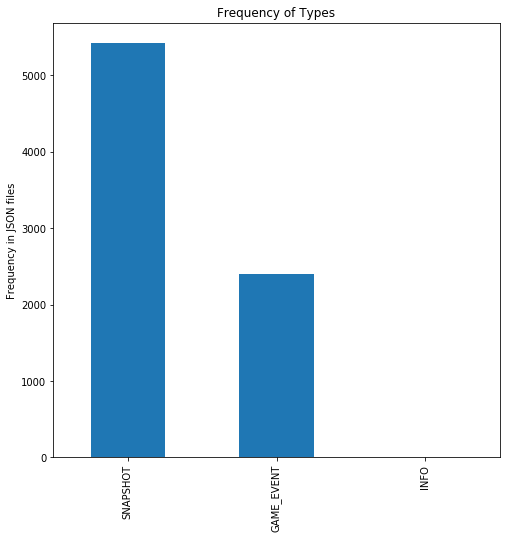

In [56]:
plt.figure(figsize=(8,8))
cleanedtable2['payload.type'].value_counts().plot(kind="bar")
plt.ylabel("Frequency in JSON files")
plt.title("Frequency of Types")

Bar chart showing the frequency of types of subjects in table. 3 types: Match, Player, Team

Text(0.5, 1.0, 'Frequency of Types of Subjects')

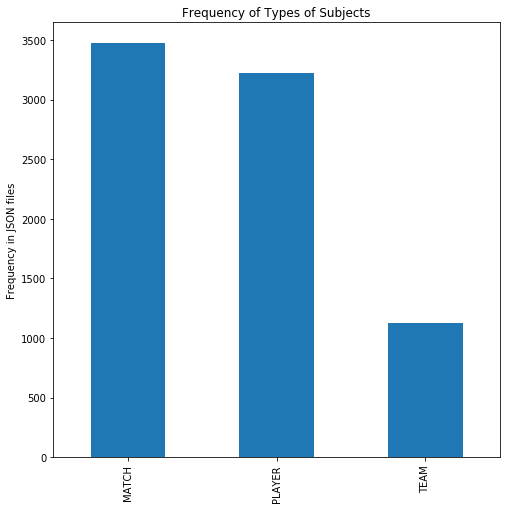

In [57]:
plt.figure(figsize=(8,8))
cleanedtable2['payload.subject'].value_counts().plot(kind="bar")
plt.ylabel("Frequency in JSON files")
plt.title("Frequency of Types of Subjects")

Bar chart that shows the frequency of different actions in table. 26 types but most common ones seem to be Update, Update Positions, Update Score, Placed Ward, and Purchased Item.

Text(0.5, 1.0, 'Frequency of Types of Actions')

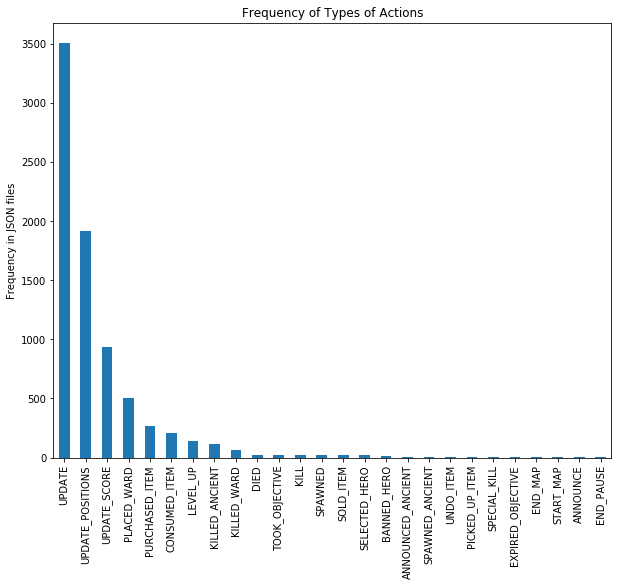

In [58]:
plt.figure(figsize=(10,8))
cleanedtable2['payload.action'].value_counts().plot(kind="bar")
plt.ylabel("Frequency in JSON files")
plt.title("Frequency of Types of Actions")

In [65]:
cleanedtable2.groupby(['payload.type','payload.subject', 'payload.action']).count()

version  payload.createdAt  \
payload.type payload.subject payload.action                                  
GAME_EVENT   MATCH           ANNOUNCED_ANCIENT        6                  6   
                             END_MAP                  1                  1   
                             END_PAUSE                1                  1   
                             EXPIRED_OBJECTIVE        1                  1   
                             SPAWNED_ANCIENT          5                  5   
                             START_MAP                1                  1   
             PLAYER          CONSUMED_ITEM          211                211   
                             DIED                    24                 24   
                             KILL                    24                 24   
                             KILLED_WARD             67                 67   
                             LEVEL_UP               142                142   
                             PICKED_UP_ITEM           2                  2   
                             PLACED_WARD            506                506   
                             PURCHASED_ITEM         267                267   
                             SELECTED_HERO           18                 18   
                             SOLD_ITEM               19                 19   
                             SPAWNED                 23                 23   
                             SPECIAL_KILL             2                  2   
                             UNDO_ITEM                3                  3   
             TEAM            BANNED_HERO             10                 10   
                             KILLED_ANCIENT         111                111   
                             TOOK_OBJECTIVE          24                 24   
                             UPDATE_SCORE           933                933   
INFO         MATCH           ANNOUNCE                 1                  1   
                             UPDATE                   1                  1   
SNAPSHOT     MATCH           UPDATE                3456               3456   
             PLAYER          UPDATE_POSITIONS      1918               1918   
             TEAM            UPDATE                  45                 45   

                                                payload.sourceUpdatedAt  \
payload.type payload.subject payload.action                               
GAME_EVENT   MATCH           ANNOUNCED_ANCIENT                        6   
                             END_MAP                                  1   
                             END_PAUSE                                1   
                             EXPIRED_OBJECTIVE                        1   
                             SPAWNED_ANCIENT                          5   
                             START_MAP                                1   
             PLAYER          CONSUMED_ITEM                          211   
                             DIED                                    24   
                             KILL                                    24   
                             KILLED_WARD                             67   
                             LEVEL_UP                               142   
                             PICKED_UP_ITEM                           2   
                             PLACED_WARD                            506   
                             PURCHASED_ITEM                         267   
                             SELECTED_HERO                           18   
                             SOLD_ITEM                               19   
                             SPAWNED                                 23   
                             SPECIAL_KILL                             2   
                             UNDO_ITEM                                3   
             TEAM            BANNED_HERO                             10   
                             KILLED_ANCIENT              

In [60]:
#Table of game events 
game_events_df = cleanedtable2[cleanedtable2["payload.type"] == "GAME_EVENT"]
game_events_df = (drop_singletons(cleanedtable))
game_events_df 

,version,payload.createdAt,payload.sourceUpdatedAt,payload.type,payload.subject,payload.action,payload.payload.fixture.references.RIOT_ESPORTS_ID,payload.payload.fixture.urn,payload.payload.fixture.startTime,payload.payload.fixture.title,...,payload.payload.dragonType,payload.payload.championId,payload.payload.spawnGameTime,payload.payload.buildingType,payload.payload.buildingTeamUrn,payload.payload.lane,payload.payload.turretTier,payload.payload.killType,payload.payload.killStreak,payload.payload.matchCurrent
0,0.3,2020-09-08T15:46:28.129Z,2020-08-09T23:55:00Z,INFO,MATCH,ANNOUNCE,104661880072106385,None,2020-08-09T23:55:00Z,LOL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3,2020-09-08T15:46:28.164Z,2020-08-09T23:56:00Z,SNAPSHOT,TEAM,UPDATE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3,2020-09-08T15:46:30.736Z,2020-08-10T00:02:43.880Z,GAME_EVENT,PLAYER,PURCHASED_ITEM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,2020-09-08T15:46:33.762Z,2020-08-10T00:07:13.632Z,SNAPSHOT,MATCH,UPDATE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3,2020-09-08T15:46:33.766Z,2020-08-10T00:07:14.658Z,SNAPSHOT,PLAYER,UPDATE_POSITIONS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,0.3,2020-09-08T15:46:33.750Z,2020-08-10T00:07:12.607Z,GAME_EVENT,TEAM,UPDATE_SCORE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7818,0.3,2020-09-08T15:46:33.750Z,2020-08-10T00:07:12.607Z,SNAPSHOT,PLAYER,UPDATE_POSITIONS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7819,0.3,2020-09-08T15:46:33.751Z,2020-08-10T00:07:12.607Z,SNAPSHOT,MATCH,UPDATE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7820,0.3,2020-09-08T15:46:33.757Z,2020-08-10T00:07:13.036Z,SNAPSHOT,MATCH,UPDATE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
game_events_df2 = drop_singletons(drop_nan_columns(game_events_df[game_events_df["payload.action"] == "CONSUMED_ITEM"])).sort_values("payload.payload.gameTime").set_index("payload.payload.gameTime")
game_events_df2

,version,payload.createdAt,payload.sourceUpdatedAt,payload.type,payload.subject,payload.action,payload.additionalProperties.esportsLeagueId,payload.additionalProperties.esportsGameID,payload.additionalProperties.esportsLeagueSlug,payload.additionalProperties.esportsLeagueName,payload.additionalProperties.taskId,payload.additionalProperties.esportsMatchId,payload.payload.playerUrn,payload.payload.teamUrn,payload.payload.item
payload.payload.gameTime,,,,,,,,,,,,,,,
173733.0,0.3,2020-09-08T15:46:32.821Z,2020-08-10T00:05:34.880Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,2003.0
185374.0,0.3,2020-09-08T15:46:32.930Z,2020-08-10T00:05:46.520Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,live:lol:riot:team:98926509884398584,2403.0
196346.0,0.3,2020-09-08T15:46:33.040Z,2020-08-10T00:05:57.493Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:8915f0bb-d328-3bc1-942e-8...,live:lol:riot:team:98926509883054987,2403.0
207018.0,0.3,2020-09-08T15:46:33.181Z,2020-08-10T00:06:08.165Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,2003.0
217482.0,0.3,2020-09-08T15:46:33.268Z,2020-08-10T00:06:18.629Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:e66f1422-8eef-3d25-8d67-4...,live:lol:riot:team:98926509884398584,3340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892154.0,0.3,2020-09-08T15:46:54.024Z,2020-08-10T00:34:13.301Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:20b86034-5de9-3fcc-a8ba-7...,live:lol:riot:team:98926509883054987,2055.0
1920019.0,0.3,2020-09-08T15:46:54.354Z,2020-08-10T00:34:41.165Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:6710acba-1669-31e2-b964-0...,live:lol:riot:team:98926509883054987,2055.0
1920052.0,0.3,2020-09-08T15:46:54.373Z,2020-08-10T00:34:41.199Z,GAME_EVENT,PLAYER,CONSUMED_ITEM,98767991299243165,104661880072106385,lcs,LCS,c03830b2-c709-4213-989b-3c7d4233185d,104661880071975312,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,live:lol:riot:team:98926509884398584,1037.0


In [17]:
'''
#Time series visualization attempt

copy = cleanedtable.set_index("payload.payload.gameTime")

#copycleanedtable.index = pd.to_datetime(copycleanedtable["payload.payload.gameTime"]) Bad code

sns.set(rc={'figure.figsize':(20, 10)})
copy.plot(subplots=True, legend=False)


'\n#Time series visualization attempt\n\ncopy = cleanedtable.set_index("payload.payload.gameTime")\n\n#copycleanedtable.index = pd.to_datetime(copycleanedtable["payload.payload.gameTime"]) Bad code\n\nsns.set(rc={\'figure.figsize\':(20, 10)})\ncopy.plot(subplots=True, legend=False)\n'

In [18]:
current_df = drop_singletons(drop_nan_columns(game_events_df[game_events_df["payload.action"] == "CONSUMED_ITEM"])).sort_values("payload.payload.gameTime").set_index("payload.payload.gameTime")
current_df

,payload.createdAt,payload.sourceUpdatedAt,payload.payload.playerUrn,payload.payload.teamUrn,payload.payload.item
payload.payload.gameTime,,,,,
173733.0,2020-09-08T15:46:32.821Z,2020-08-10T00:05:34.880Z,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,2003.0
185374.0,2020-09-08T15:46:32.930Z,2020-08-10T00:05:46.520Z,live:lol:riot:player:539226e8-3b93-3c56-95c4-b...,live:lol:riot:team:98926509884398584,2403.0
196346.0,2020-09-08T15:46:33.040Z,2020-08-10T00:05:57.493Z,live:lol:riot:player:8915f0bb-d328-3bc1-942e-8...,live:lol:riot:team:98926509883054987,2403.0
207018.0,2020-09-08T15:46:33.181Z,2020-08-10T00:06:08.165Z,live:lol:riot:player:500f7e12-1dc0-39fd-8711-4...,live:lol:riot:team:98926509884398584,2003.0
217482.0,2020-09-08T15:46:33.268Z,2020-08-10T00:06:18.629Z,live:lol:riot:player:e66f1422-8eef-3d25-8d67-4...,live:lol:riot:team:98926509884398584,3340.0
...,...,...,...,...,...
1892154.0,2020-09-08T15:46:54.024Z,2020-08-10T00:34:13.301Z,live:lol:riot:player:20b86034-5de9-3fcc-a8ba-7...,live:lol:riot:team:98926509883054987,2055.0
1920019.0,2020-09-08T15:46:54.354Z,2020-08-10T00:34:41.165Z,live:lol:riot:player:6710acba-1669-31e2-b964-0...,live:lol:riot:team:98926509883054987,2055.0
1920052.0,2020-09-08T15:46:54.373Z,2020-08-10T00:34:41.199Z,live:lol:riot:player:abe4fbe5-e091-3f23-a494-9...,live:lol:riot:team:98926509884398584,1037.0
